# 🔍 DBSCAN: El Detective de Patrones Ocultos


**Fecha:** Junio 2025  
**Objetivo:** Dominar DBSCAN (Density-Based Spatial Clustering of Applications with Noise) a través de ejemplos cotidianos y aplicaciones del mundo real.

---

## 🎯 ¿Qué aprenderás en este notebook?

1. **🕵️ ¿Qué es DBSCAN?** - La analogía del sociólogo urbano
2. **🧠 Conceptos Fundamentales** - Epsilon, MinPts y tipos de puntos
3. **☕ Ejemplo 1: Cafetería** - Segmentación de clientes por comportamiento
4. **🏙️ Ejemplo 2: Análisis Urbano** - Detección de zonas de actividad en una ciudad
5. **🛒 Ejemplo 3: E-commerce** - Detección de fraude en transacciones
6. **📱 Ejemplo 4: Redes Sociales** - Identificación de comunidades
7. **⚖️ DBSCAN vs K-means** - Cuándo usar cada uno
8. **🔧 Optimización de Parámetros** - Cómo encontrar los mejores valores
9. **🚀 Aplicaciones Avanzadas** - Casos de uso empresariales

## 🛠️ Configuración Inicial

*Todas estas librerías vienen preinstaladas en Google Colab*

In [21]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos más bonitos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")
print("🎨 Configuración de gráficos lista")
print("🚀 ¡Empezamos con DBSCAN!")

✅ Librerías importadas correctamente
🎨 Configuración de gráficos lista
🚀 ¡Empezamos con DBSCAN!


## 🕵️ ¿Qué es DBSCAN? - La Analogía del Sociólogo Urbano

### 🏙️ Imagina que eres un sociólogo estudiando una gran ciudad...

Estás parado en la azotea de un rascacielos con binoculares, observando cómo se comporta la gente en la ciudad. Tu trabajo es **identificar comunidades naturales** sin saber de antemano cuántas hay o qué forma tienen.

**¿Qué observas?**
- 🏢 **Zonas densas:** Centros comerciales, plazas, estaciones de metro donde se agrupa mucha gente
- 🚶 **Personas conectadas:** Gente que camina junta, familias, grupos de amigos
- 🧍 **Individuos aislados:** Personas solitarias que no pertenecen a ningún grupo
- 🌉 **Formas irregulares:** Las comunidades no son círculos perfectos, sino que siguen calles, parques, ríos

**DBSCAN funciona exactamente así:**
- No necesitas decirle cuántas comunidades buscar (como sí necesita K-means)
- Encuentra grupos de **cualquier forma** (no solo círculos)
- Identifica automáticamente **individuos atípicos** (outliers)
- Se basa en **densidad local**, no en distancia a centros

### 🧠 Los Conceptos Clave (Con Analogías)

| Concepto | Analogía Urbana | Definición Técnica |
|----------|-----------------|--------------------|
| **Epsilon (ε)** | 📏 **Radio de influencia social** - Qué tan lejos puede "gritar" una persona para que otros la escuchen | Distancia máxima entre dos puntos para considerarlos vecinos |
| **MinPts** | 👥 **Tamaño mínimo de grupo** - Cuántas personas necesitas alrededor para formar una "reunión" | Número mínimo de puntos en el radio ε para formar un cluster |
| **Punto Central** | 🎯 **Líder comunitario** - Persona popular rodeada de suficientes vecinos | Punto que tiene al menos MinPts vecinos dentro del radio ε |
| **Punto de Borde** | 🤝 **Miembro periférico** - Persona que está cerca de un líder pero no es líder | Punto que no es central pero está dentro del radio ε de un punto central |
| **Ruido/Outlier** | 🧍 **Individuo aislado** - Persona que está sola, sin grupo | Punto que no es central ni está cerca de ningún punto central |

🎨 Creando visualización de conceptos básicos...


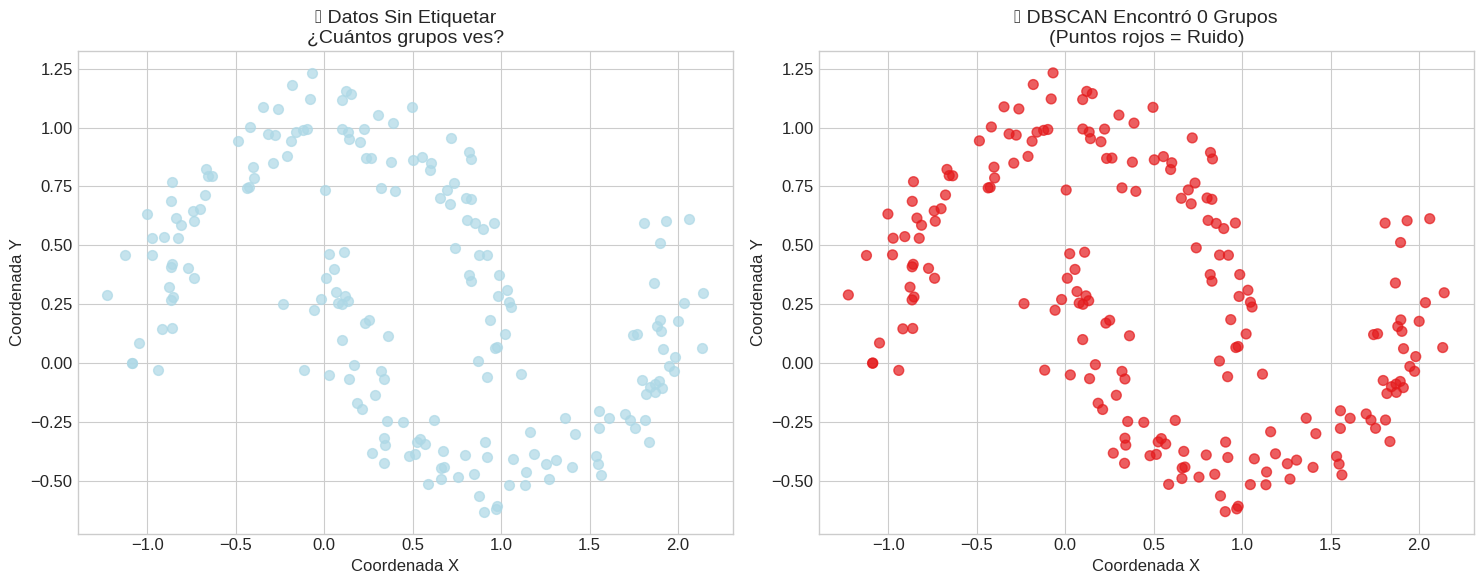

📊 Resultados:
   🎯 Clusters encontrados: 1
   🧍 Puntos de ruido: 0
   ✨ ¡DBSCAN descubrió automáticamente la estructura sin que le dijéramos cuántos grupos buscar!


In [22]:
# Crear una visualización introductoria para entender los conceptos
print("🎨 Creando visualización de conceptos básicos...")

# Generar datos de ejemplo con formas complejas
# Dos lunas entrelazadas (como dos comunidades que se tocan)
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

# Aplicar DBSCAN
dbscan_intro = DBSCAN(eps=0.3, min_samples=5)
clusters_intro = dbscan_intro.fit_predict(X_moons)

# Crear subplots para comparar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Datos originales
ax1.scatter(X_moons[:, 0], X_moons[:, 1], c='lightblue', s=50, alpha=0.7)
ax1.set_title('🤔 Datos Sin Etiquetar\n¿Cuántos grupos ves?', fontsize=14)
ax1.set_xlabel('Coordenada X')
ax1.set_ylabel('Coordenada Y')

# Resultados de DBSCAN
unique_labels = set(clusters_intro)
colors = ['red' if label == -1 else plt.cm.Set1(label) for label in clusters_intro]
ax2.scatter(X_moons[:, 0], X_moons[:, 1], c=colors, s=50, alpha=0.7)
ax2.set_title(f'🎯 DBSCAN Encontró {len(unique_labels)-1} Grupos\n(Puntos rojos = Ruido)', fontsize=14)
ax2.set_xlabel('Coordenada X')
ax2.set_ylabel('Coordenada Y')

plt.tight_layout()
plt.show()

n_clusters = len(set(clusters_intro)) - (1 if -1 in clusters_intro else 0)
n_noise = list(clusters_intro).count(-1)
print(f"📊 Resultados:")
print(f"   🎯 Clusters encontrados: {n_clusters}")
print(f"   🧍 Puntos de ruido: {n_noise}")
print(f"   ✨ ¡DBSCAN descubrió automáticamente la estructura sin que le dijéramos cuántos grupos buscar!")

## ☕ Ejemplo 1: La Cafetería Inteligente

### 🎯 El Problema Empresarial

Eres el dueño de una cadena de cafeterías y quieres entender mejor a tus clientes para:
- 🎁 Crear ofertas personalizadas
- ⏰ Optimizar horarios de personal
- 📍 Decidir dónde abrir nuevas sucursales
- 💰 Maximizar ingresos por cliente

**Datos disponibles:**
- Frecuencia de visitas por mes
- Gasto promedio por visita
- Hora preferida de visita
- Tipo de productos que compra

### 🤔 ¿Por qué DBSCAN y no K-means?

- **No sabemos cuántos tipos de clientes hay** (K-means requiere que especifiques K)
- **Los grupos pueden tener formas raras** (estudiantes vs ejecutivos vs jubilados tienen patrones muy diferentes)
- **Queremos identificar clientes atípicos** (turistas, compradores de una sola vez)

### ☕ Simulando Datos Realistas de la Cafetería

In [23]:
# Generar datos realistas de clientes de la cafetería
print("☕ Generando datos de clientes de la cafetería...")
np.random.seed(42)
n_customers = 500

# Definir 4 tipos de clientes con características específicas
customer_types = {
    'Estudiantes': {
        'n': 150,
        'visitas_mes': (15, 25),  # Van mucho, estudian ahí
        'gasto_promedio': (8, 15),  # Poco dinero
        'hora_preferida': (14, 20),  # Tarde/noche
    },
    'Ejecutivos': {
        'n': 120,
        'visitas_mes': (20, 30),  # Van mucho, reuniones de trabajo
        'gasto_promedio': (25, 45),  # Gastan más
        'hora_preferida': (7, 10),  # Mañana temprano
    },
    'Familias': {
        'n': 100,
        'visitas_mes': (4, 8),  # Fines de semana principalmente
        'gasto_promedio': (35, 60),  # Gastan mucho (varios miembros)
        'hora_preferida': (10, 14),  # Brunch/almuerzo
    },
    'Jubilados': {
        'n': 80,
        'visitas_mes': (8, 15),  # Tiempo libre, pero no tanto dinero
        'gasto_promedio': (12, 20),  # Moderado
        'hora_preferida': (9, 12),  # Mañana media
    }
}

# Generar datos para cada tipo
all_data = []
true_labels = []

for i, (tipo, params) in enumerate(customer_types.items()):
    n = params['n']

    # Generar datos con distribución normal
    visitas = np.random.normal(
        (params['visitas_mes'][0] + params['visitas_mes'][1]) / 2,
        (params['visitas_mes'][1] - params['visitas_mes'][0]) / 4,
        n
    )

    gasto = np.random.normal(
        (params['gasto_promedio'][0] + params['gasto_promedio'][1]) / 2,
        (params['gasto_promedio'][1] - params['gasto_promedio'][0]) / 4,
        n
    )

    hora = np.random.normal(
        (params['hora_preferida'][0] + params['hora_preferida'][1]) / 2,
        (params['hora_preferida'][1] - params['hora_preferida'][0]) / 4,
        n
    )

    # Asegurar valores positivos y en rangos lógicos
    visitas = np.clip(visitas, 1, 35)
    gasto = np.clip(gasto, 5, 70)
    hora = np.clip(hora, 6, 22)

    # Combinar datos
    customer_data = np.column_stack([visitas, gasto, hora])
    all_data.append(customer_data)
    true_labels.extend([i] * n)

# Agregar algunos clientes atípicos (turistas, compradores únicos)
n_outliers = 50
outlier_data = np.random.uniform(
    [1, 5, 6],   # mínimos
    [35, 70, 22], # máximos
    (n_outliers, 3)
)
all_data.append(outlier_data)
true_labels.extend([-1] * n_outliers)  # -1 para outliers

# Combinar todos los datos
X_cafe = np.vstack(all_data)
y_true_cafe = np.array(true_labels)

# Crear DataFrame para mejor visualización
df_cafe = pd.DataFrame(X_cafe, columns=['Visitas_Mes', 'Gasto_Promedio_USD', 'Hora_Preferida'])
# Fix: Use map to convert integer labels to string labels
label_map = {0: 'Estudiantes', 1: 'Ejecutivos', 2: 'Familias', 3: 'Jubilados', -1: 'Atípicos'}
df_cafe['Tipo_Real'] = pd.Series(y_true_cafe).map(label_map)

print(f"✅ Generados {len(df_cafe)} clientes")
print("\n📊 Resumen de los datos:")
print(df_cafe.groupby('Tipo_Real').agg({
    'Visitas_Mes': ['mean', 'std'],
    'Gasto_Promedio_USD': ['mean', 'std'],
    'Hora_Preferida': ['mean', 'std']
}).round(2))

☕ Generando datos de clientes de la cafetería...
✅ Generados 500 clientes

📊 Resumen de los datos:
            Visitas_Mes       Gasto_Promedio_USD        Hora_Preferida      
                   mean   std               mean    std           mean   std
Tipo_Real                                                                   
Atípicos          18.08  8.76              38.96  18.63          13.93  5.31
Ejecutivos        24.64  2.46              35.19   5.24           8.50  0.70
Estudiantes       19.79  2.36              11.62   1.79          17.08  1.42
Familias           6.27  0.95              47.75   5.95          12.12  1.03
Jubilados         11.72  1.90              16.00   1.95          10.52  0.71


🎨 Visualizando patrones de clientes...


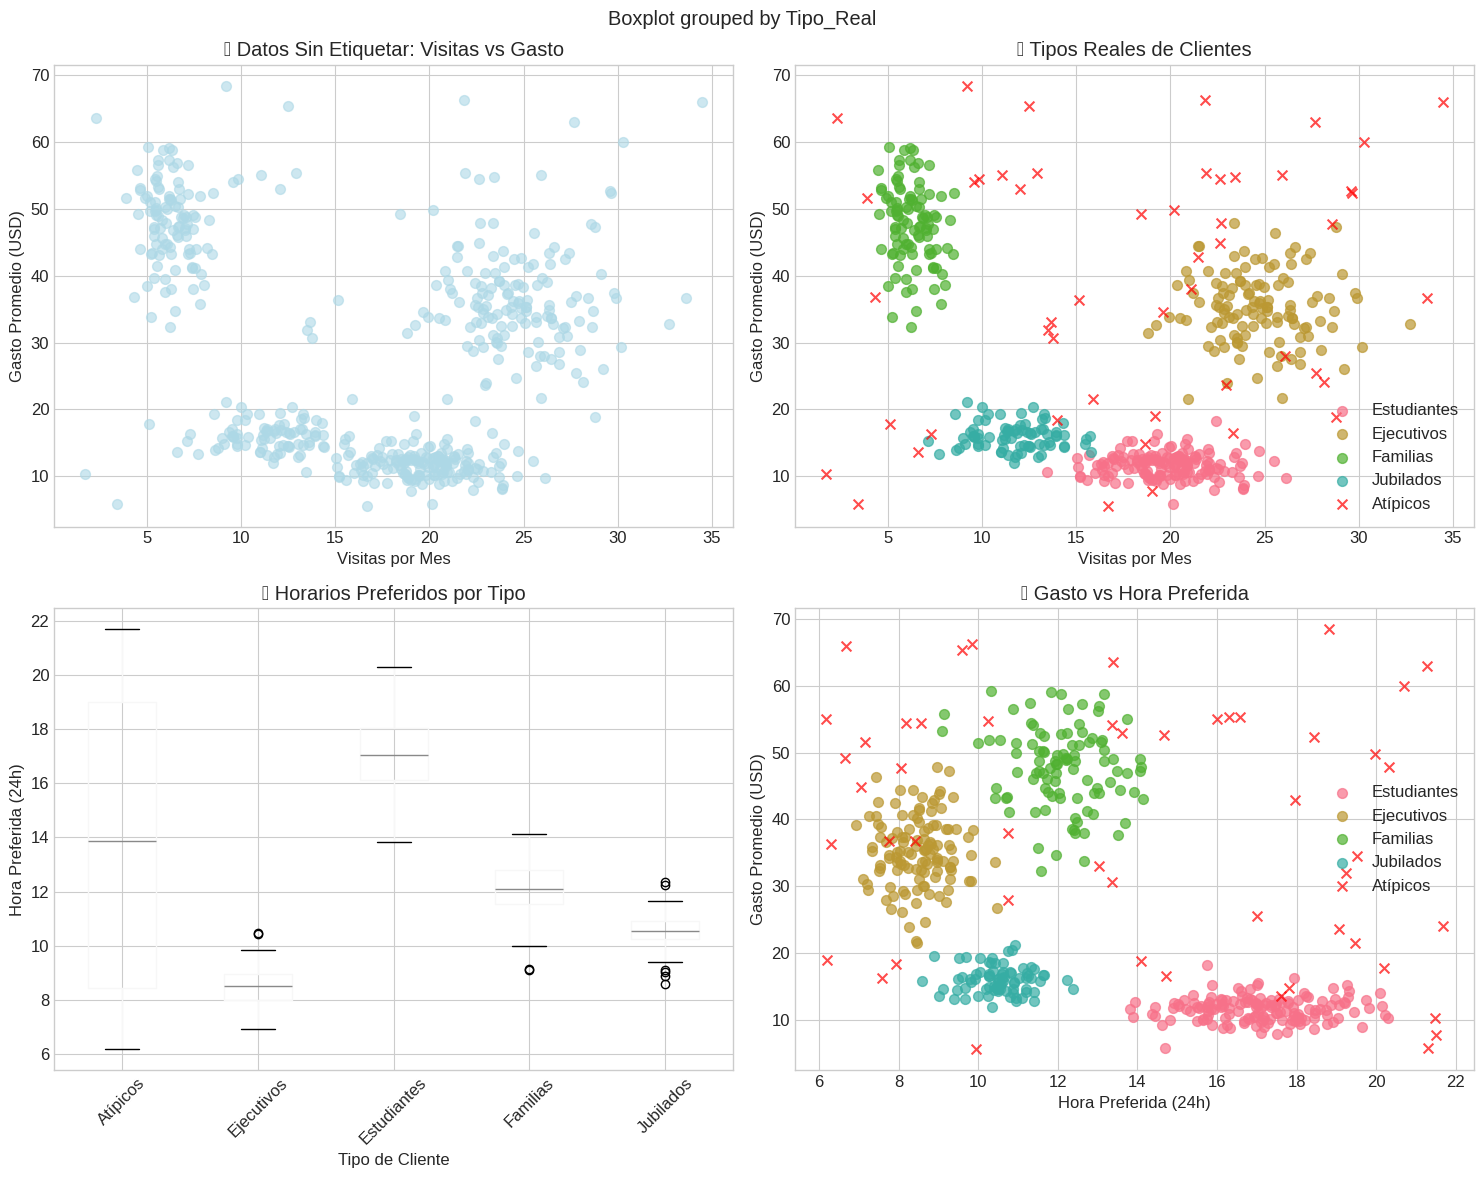


🧠 Observaciones iniciales:
   📈 Los ejecutivos gastan más y van temprano
   🎓 Los estudiantes van mucho pero gastan poco
   👨‍👩‍👧‍👦 Las familias gastan mucho pero van poco (fines de semana)
   👴 Los jubilados tienen horarios y gastos moderados
   ❌ Los atípicos no siguen ningún patrón claro


In [24]:
# Visualizar los datos de la cafetería
print("🎨 Visualizando patrones de clientes...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Visitas vs Gasto (sin etiquetar)
axes[0,0].scatter(df_cafe['Visitas_Mes'], df_cafe['Gasto_Promedio_USD'],
                 alpha=0.6, s=50, c='lightblue')
axes[0,0].set_title('🤔 Datos Sin Etiquetar: Visitas vs Gasto')
axes[0,0].set_xlabel('Visitas por Mes')
axes[0,0].set_ylabel('Gasto Promedio (USD)')

# 2. Visitas vs Gasto (con etiquetas reales)
for tipo in df_cafe['Tipo_Real'].unique():
    if tipo != 'Atípicos':
        subset = df_cafe[df_cafe['Tipo_Real'] == tipo]
        axes[0,1].scatter(subset['Visitas_Mes'], subset['Gasto_Promedio_USD'],
                         label=tipo, alpha=0.7, s=50)
    else:
        subset = df_cafe[df_cafe['Tipo_Real'] == tipo]
        axes[0,1].scatter(subset['Visitas_Mes'], subset['Gasto_Promedio_USD'],
                         label=tipo, alpha=0.7, s=50, c='red', marker='x')

axes[0,1].set_title('✅ Tipos Reales de Clientes')
axes[0,1].set_xlabel('Visitas por Mes')
axes[0,1].set_ylabel('Gasto Promedio (USD)')
axes[0,1].legend()

# 3. Distribución de horas preferidas
df_cafe.boxplot(column='Hora_Preferida', by='Tipo_Real', ax=axes[1,0])
axes[1,0].set_title('⏰ Horarios Preferidos por Tipo')
axes[1,0].set_xlabel('Tipo de Cliente')
axes[1,0].set_ylabel('Hora Preferida (24h)')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# 4. Gasto vs Hora
for tipo in df_cafe['Tipo_Real'].unique():
    if tipo != 'Atípicos':
        subset = df_cafe[df_cafe['Tipo_Real'] == tipo]
        axes[1,1].scatter(subset['Hora_Preferida'], subset['Gasto_Promedio_USD'],
                         label=tipo, alpha=0.7, s=50)
    else:
        subset = df_cafe[df_cafe['Tipo_Real'] == tipo]
        axes[1,1].scatter(subset['Hora_Preferida'], subset['Gasto_Promedio_USD'],
                         label=tipo, alpha=0.7, s=50, c='red', marker='x')

axes[1,1].set_title('🕐 Gasto vs Hora Preferida')
axes[1,1].set_xlabel('Hora Preferida (24h)')
axes[1,1].set_ylabel('Gasto Promedio (USD)')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("\n🧠 Observaciones iniciales:")
print("   📈 Los ejecutivos gastan más y van temprano")
print("   🎓 Los estudiantes van mucho pero gastan poco")
print("   👨‍👩‍👧‍👦 Las familias gastan mucho pero van poco (fines de semana)")
print("   👴 Los jubilados tienen horarios y gastos moderados")
print("   ❌ Los atípicos no siguen ningún patrón claro")

🔍 Aplicando DBSCAN para descubrir segmentos de clientes...


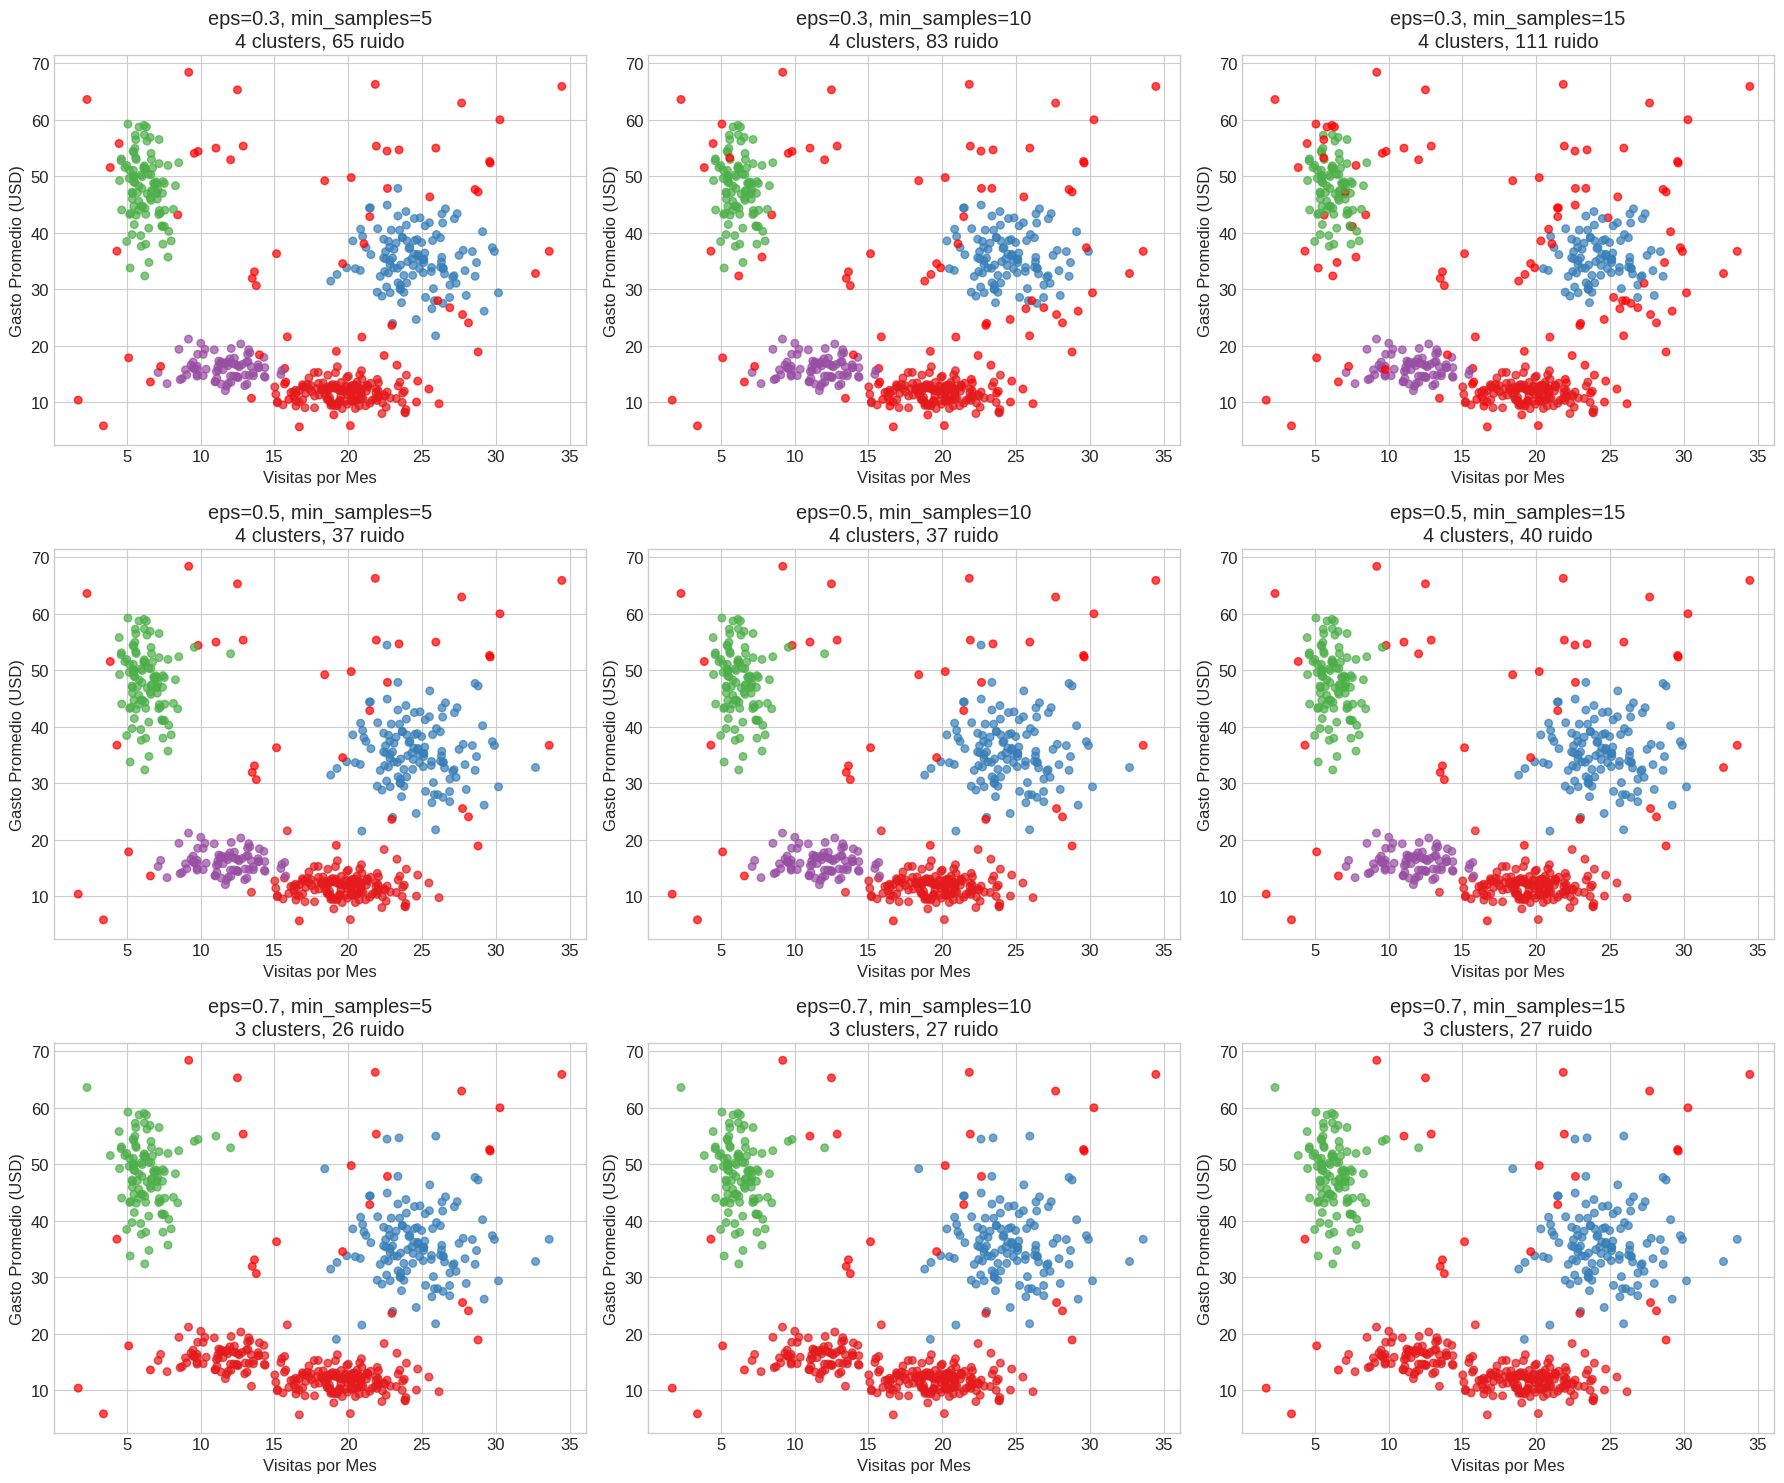


📊 Resumen de experimentos:
   eps  min_samples  n_clusters  n_noise
0  0.3            5           4       65
1  0.3           10           4       83
2  0.3           15           4      111
3  0.5            5           4       37
4  0.5           10           4       37
5  0.5           15           4       40
6  0.7            5           3       26
7  0.7           10           3       27
8  0.7           15           3       27


In [18]:
# Aplicar DBSCAN a los datos de la cafetería
print("🔍 Aplicando DBSCAN para descubrir segmentos de clientes...")

# Preparar los datos (escalar es importante para DBSCAN)
scaler = StandardScaler()
X_cafe_scaled = scaler.fit_transform(X_cafe)

# Aplicar DBSCAN con diferentes parámetros
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(18, 15))

results = []

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Aplicar DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_cafe_scaled)

        # Calcular métricas
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)

        # Guardar resultados
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'clusters': clusters
        })

        # Visualizar (usando solo 2 dimensiones para simplicidad)
        ax = axes[i, j]

        # Colorear puntos según cluster
        unique_labels = set(clusters)
        colors = ['red' if label == -1 else plt.cm.Set1(label % 10) for label in clusters]

        ax.scatter(df_cafe['Visitas_Mes'], df_cafe['Gasto_Promedio_USD'],
                  c=colors, alpha=0.7, s=30)
        ax.set_title(f'eps={eps}, min_samples={min_samples}\n{n_clusters} clusters, {n_noise} ruido')
        ax.set_xlabel('Visitas por Mes')
        ax.set_ylabel('Gasto Promedio (USD)')

plt.tight_layout()
plt.show()

# Mostrar resumen de resultados
print("\n📊 Resumen de experimentos:")
results_df = pd.DataFrame(results)
print(results_df[['eps', 'min_samples', 'n_clusters', 'n_noise']])

🎯 Seleccionando los mejores parámetros...

🎉 Resultados finales con eps=0.5, min_samples=10:
   🎯 Clusters encontrados: 4
   🧍 Clientes atípicos: 37 (7.4%)


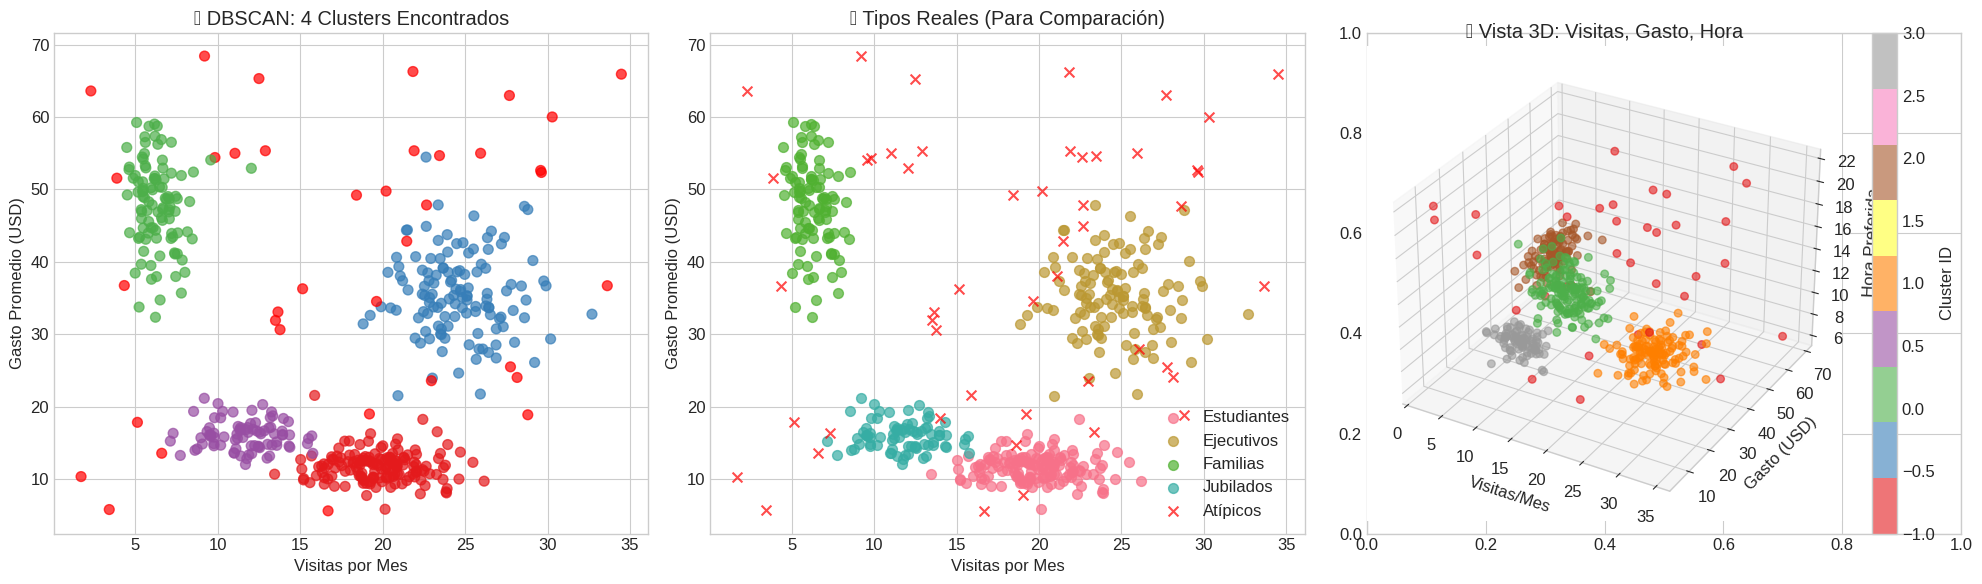


🧠 Interpretación de los clusters encontrados:

🧍 Cluster -1 (RUIDO/ATÍPICOS): 37 clientes
   📊 Características: Muy variadas, sin patrón claro
   💡 Interpretación: Turistas, compradores únicos, casos especiales
   🎯 Acción: Atención personalizada, ofertas especiales para convertir

🎯 Cluster 0: 154 clientes
   📊 Promedio: 19.8 visitas/mes, $11.7/visita, 17.1h
   💡 Interpretación: 👴 Jubilados/Regulares - Moderados en todo
   🎯 Acción recomendada: Programa de lealtad, descuentos para tercera edad

🎯 Cluster 1: 125 clientes
   📊 Promedio: 24.6 visitas/mes, $35.5/visita, 8.5h
   💡 Interpretación: 💼 Ejecutivos - Frecuentes y alto gasto
   🎯 Acción recomendada: Programa VIP, servicio express, wifi premium

🎯 Cluster 2: 102 clientes
   📊 Promedio: 6.4 visitas/mes, $47.9/visita, 12.1h
   💡 Interpretación: 👨‍👩‍👧‍👦 Familias - Ocasionales pero alto gasto
   🎯 Acción recomendada: Ofertas familiares, menús para niños, eventos especiales

🎯 Cluster 3: 82 clientes
   📊 Promedio: 11.7 visitas/mes, $1

In [19]:
# Seleccionar los mejores parámetros y analizar resultados
print("🎯 Seleccionando los mejores parámetros...")

# Elegir parámetros que den un número razonable de clusters (3-5) y poco ruido
best_params = {'eps': 0.5, 'min_samples': 10}
dbscan_final = DBSCAN(**best_params)
clusters_final = dbscan_final.fit_predict(X_cafe_scaled)

# Agregar clusters al DataFrame
df_cafe['Cluster_DBSCAN'] = clusters_final

# Análisis detallado
n_clusters_final = len(set(clusters_final)) - (1 if -1 in clusters_final else 0)
n_noise_final = list(clusters_final).count(-1)

print(f"\n🎉 Resultados finales con eps={best_params['eps']}, min_samples={best_params['min_samples']}:")
print(f"   🎯 Clusters encontrados: {n_clusters_final}")
print(f"   🧍 Clientes atípicos: {n_noise_final} ({n_noise_final/len(df_cafe)*100:.1f}%)")

# Visualización final mejorada
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Resultados de DBSCAN
unique_labels = set(clusters_final)
# Ensure colors is a simple list of color values for scatter plot
colors = [plt.cm.Set1(label % 10) if label != -1 else 'red' for label in clusters_final]

scatter = axes[0].scatter(df_cafe['Visitas_Mes'], df_cafe['Gasto_Promedio_USD'],
                         c=colors, alpha=0.7, s=50)
axes[0].set_title(f'🔍 DBSCAN: {n_clusters_final} Clusters Encontrados')
axes[0].set_xlabel('Visitas por Mes')
axes[0].set_ylabel('Gasto Promedio (USD)')

# 2. Comparación con tipos reales
for tipo in df_cafe['Tipo_Real'].unique():
    if tipo != 'Atípicos':
        subset = df_cafe[df_cafe['Tipo_Real'] == tipo]
        axes[1].scatter(subset['Visitas_Mes'], subset['Gasto_Promedio_USD'],
                       label=tipo, alpha=0.7, s=50)
    else:
        subset = df_cafe[df_cafe['Tipo_Real'] == tipo]
        axes[1].scatter(subset['Visitas_Mes'], subset['Gasto_Promedio_USD'],
                       label=tipo, alpha=0.7, s=50, c='red', marker='x')

axes[1].set_title('✅ Tipos Reales (Para Comparación)')
axes[1].set_xlabel('Visitas por Mes')
axes[1].set_ylabel('Gasto Promedio (USD)')
axes[1].legend()

# 3. Análisis 3D (proyección)
from mpl_toolkits.mplot3d import Axes3D
ax3d = fig.add_subplot(133, projection='3d')
# Fix: Use cluster labels directly for coloring in 3D plot
scatter3d = ax3d.scatter(df_cafe['Visitas_Mes'], df_cafe['Gasto_Promedio_USD'], df_cafe['Hora_Preferida'],
            c=clusters_final, cmap='Set1', alpha=0.6, s=30) # Use clusters_final as color and specify a colormap
ax3d.set_title('🌐 Vista 3D: Visitas, Gasto, Hora')
ax3d.set_xlabel('Visitas/Mes')
ax3d.set_ylabel('Gasto (USD)')
ax3d.set_zlabel('Hora Preferida')

# Add a color bar for the 3D plot
fig.colorbar(scatter3d, ax=ax3d, label='Cluster ID')

plt.tight_layout()
plt.show()

# Análisis de cada cluster encontrado
print("\n🧠 Interpretación de los clusters encontrados:")
for cluster_id in sorted(set(clusters_final)):
    if cluster_id == -1:
        subset = df_cafe[df_cafe['Cluster_DBSCAN'] == cluster_id]
        print(f"\n🧍 Cluster {cluster_id} (RUIDO/ATÍPICOS): {len(subset)} clientes")
        print(f"   📊 Características: Muy variadas, sin patrón claro")
        print(f"   💡 Interpretación: Turistas, compradores únicos, casos especiales")
        print(f"   🎯 Acción: Atención personalizada, ofertas especiales para convertir")
    else:
        subset = df_cafe[df_cafe['Cluster_DBSCAN'] == cluster_id]
        avg_visitas = subset['Visitas_Mes'].mean()
        avg_gasto = subset['Gasto_Promedio_USD'].mean()
        avg_hora = subset['Hora_Preferida'].mean()

        print(f"\n🎯 Cluster {cluster_id}: {len(subset)} clientes")
        print(f"   📊 Promedio: {avg_visitas:.1f} visitas/mes, ${avg_gasto:.1f}/visita, {avg_hora:.1f}h")

        # Interpretación basada en características
        if avg_visitas > 20 and avg_gasto < 20:
            interpretacion = "🎓 Estudiantes - Frecuentes pero bajo gasto"
            accion = "Ofertas de estudiante, descuentos por volumen"
        elif avg_visitas > 20 and avg_gasto > 25:
            interpretacion = "💼 Ejecutivos - Frecuentes y alto gasto"
            accion = "Programa VIP, servicio express, wifi premium"
        elif avg_visitas < 10 and avg_gasto > 30:
            interpretacion = "👨‍👩‍👧‍👦 Familias - Ocasionales pero alto gasto"
            accion = "Ofertas familiares, menús para niños, eventos especiales"
        else:
            interpretacion = "👴 Jubilados/Regulares - Moderados en todo"
            accion = "Programa de lealtad, descuentos para tercera edad"

        print(f"   💡 Interpretación: {interpretacion}")
        print(f"   🎯 Acción recomendada: {accion}")

## 🏙️ Ejemplo 2: Análisis Urbano - Detectando Zonas de Actividad

### 🎯 El Problema Empresarial

Trabajas para el **departamento de planificación urbana** de una gran ciudad. Tu misión es:
- 🚌 Optimizar rutas de transporte público
- 🏪 Identificar zonas comerciales emergentes
- 🚨 Mejorar la distribución de servicios de emergencia
- 🌳 Planificar espacios verdes y recreativos

**Datos disponibles:**
- Coordenadas GPS de actividad económica (transacciones, check-ins, etc.)
- Densidad de población por área
- Actividad en diferentes horarios

### 🤔 ¿Por qué DBSCAN es perfecto aquí?

- **Las zonas urbanas tienen formas irregulares** (siguen calles, ríos, topografía)
- **No sabemos cuántas zonas de actividad hay**
- **Queremos identificar áreas aisladas** que necesiten más atención
- **La densidad es más importante que la distancia** (una calle puede separar dos zonas muy diferentes)

In [26]:
# Simular datos de actividad urbana
print("🏙️ Generando datos de actividad urbana...")
np.random.seed(42)

# Definir zonas de actividad con formas complejas
zones = {
    'Centro_Financiero': {
        'center': (5, 8),
        'n_points': 200,
        'spread': 1.5,
        'activity_level': 'high'
    },
    'Zona_Universitaria': {
        'center': (2, 3),
        'n_points': 150,
        'spread': 2.0,
        'activity_level': 'medium'
    },
    'Distrito_Comercial': {
        'center': (8, 4),
        'n_points': 180,
        'spread': 1.8,
        'activity_level': 'high'
    },
    'Zona_Residencial': {
        'center': (6, 1),
        'n_points': 120,
        'spread': 2.5,
        'activity_level': 'low'
    },
    'Corredor_Turistico': {
        'center': (1, 7),
        'n_points': 100,
        'spread': 3.0,
        'activity_level': 'medium'
    }
}

# Generar puntos para cada zona
all_points = []
all_activities = []
true_zones = []

activity_levels = {'low': 1, 'medium': 2, 'high': 3}

for i, (zone_name, params) in enumerate(zones.items()):
    # Generar puntos con distribución normal alrededor del centro
    points = np.random.multivariate_normal(
        params['center'],
        [[params['spread'], 0], [0, params['spread']]],
        params['n_points']
    )

    # Generar nivel de actividad con algo de ruido
    base_activity = activity_levels[params['activity_level']]
    activities = np.random.normal(base_activity, 0.3, params['n_points'])
    activities = np.clip(activities, 0.5, 3.5)

    all_points.append(points)
    all_activities.extend(activities)
    true_zones.extend([i] * params['n_points'])

# Agregar puntos aislados (zonas rurales, parques, etc.)
n_isolated = 80
isolated_points = np.random.uniform([0, 0], [10, 10], (n_isolated, 2))
isolated_activities = np.random.uniform(0.1, 1.0, n_isolated)

all_points.append(isolated_points)
all_activities.extend(isolated_activities)
true_zones.extend([-1] * n_isolated)

# Combinar todos los datos
X_urban = np.vstack(all_points)
activities = np.array(all_activities)
y_true_urban = np.array(true_zones)

# Create a mapping from integer labels to zone names
zone_map = {
    0: 'Centro_Financiero',
    1: 'Zona_Universitaria',
    2: 'Distrito_Comercial',
    3: 'Zona_Residencial',
    4: 'Corredor_Turistico',
    -1: 'Aislado'
}

# Crear DataFrame
df_urban = pd.DataFrame({
    'X_coord': X_urban[:, 0],
    'Y_coord': X_urban[:, 1],
    'Activity_Level': activities,
    # Fix: Use map to convert integer labels to string labels
    'True_Zone': pd.Series(y_true_urban).map(zone_map)
})

print(f"✅ Generados {len(df_urban)} puntos de actividad urbana")
print("\n📊 Distribución por zonas:")
print(df_urban['True_Zone'].value_counts())

🏙️ Generando datos de actividad urbana...
✅ Generados 830 puntos de actividad urbana

📊 Distribución por zonas:
True_Zone
Centro_Financiero     200
Distrito_Comercial    180
Zona_Universitaria    150
Zona_Residencial      120
Corredor_Turistico    100
Aislado                80
Name: count, dtype: int64


🗺️ Creando mapa de actividad urbana...


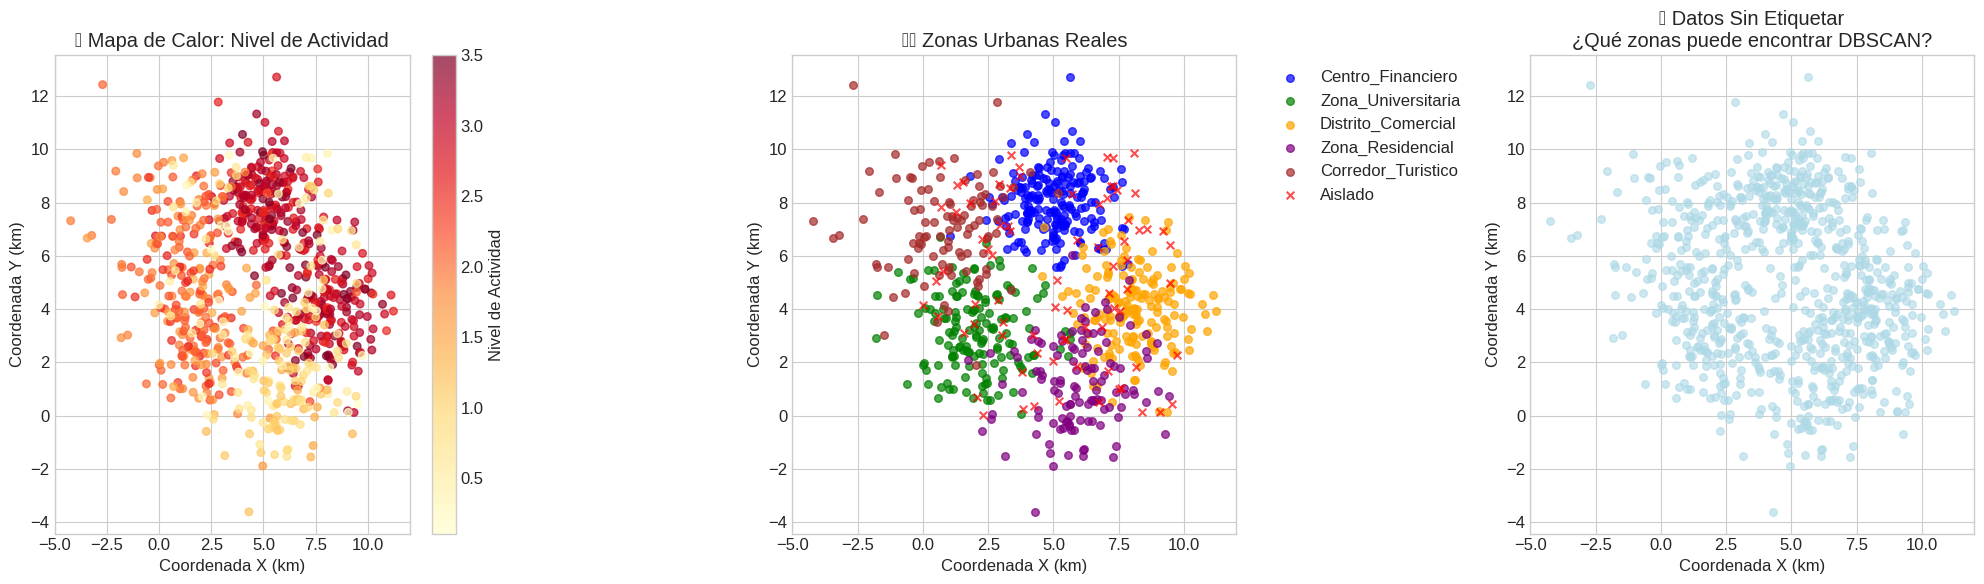


🧠 Desafíos para el algoritmo:
   🔄 Zonas de formas irregulares (no circulares)
   📏 Diferentes densidades entre zonas
   🎯 Puntos aislados que no pertenecen a ninguna zona
   🌐 Zonas que pueden estar conectadas o separadas


In [27]:
# Visualizar los datos urbanos
print("🗺️ Creando mapa de actividad urbana...")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Mapa de calor de actividad
scatter1 = axes[0].scatter(df_urban['X_coord'], df_urban['Y_coord'],
                          c=df_urban['Activity_Level'], cmap='YlOrRd',
                          s=30, alpha=0.7)
axes[0].set_title('🔥 Mapa de Calor: Nivel de Actividad')
axes[0].set_xlabel('Coordenada X (km)')
axes[0].set_ylabel('Coordenada Y (km)')
plt.colorbar(scatter1, ax=axes[0], label='Nivel de Actividad')

# 2. Zonas reales
zone_colors = {'Centro_Financiero': 'blue', 'Zona_Universitaria': 'green',
               'Distrito_Comercial': 'orange', 'Zona_Residencial': 'purple',
               'Corredor_Turistico': 'brown', 'Aislado': 'red'}

for zone in df_urban['True_Zone'].unique():
    subset = df_urban[df_urban['True_Zone'] == zone]
    marker = 'x' if zone == 'Aislado' else 'o'
    axes[1].scatter(subset['X_coord'], subset['Y_coord'],
                   c=zone_colors[zone], label=zone, alpha=0.7, s=30, marker=marker)

axes[1].set_title('🏛️ Zonas Urbanas Reales')
axes[1].set_xlabel('Coordenada X (km)')
axes[1].set_ylabel('Coordenada Y (km)')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Datos sin etiquetar (lo que vería un algoritmo)
axes[2].scatter(df_urban['X_coord'], df_urban['Y_coord'],
               c='lightblue', alpha=0.6, s=30)
axes[2].set_title('🤔 Datos Sin Etiquetar\n¿Qué zonas puede encontrar DBSCAN?')
axes[2].set_xlabel('Coordenada X (km)')
axes[2].set_ylabel('Coordenada Y (km)')

plt.tight_layout()
plt.show()

print("\n🧠 Desafíos para el algoritmo:")
print("   🔄 Zonas de formas irregulares (no circulares)")
print("   📏 Diferentes densidades entre zonas")
print("   🎯 Puntos aislados que no pertenecen a ninguna zona")
print("   🌐 Zonas que pueden estar conectadas o separadas")

🔍 Aplicando DBSCAN para detectar zonas urbanas...


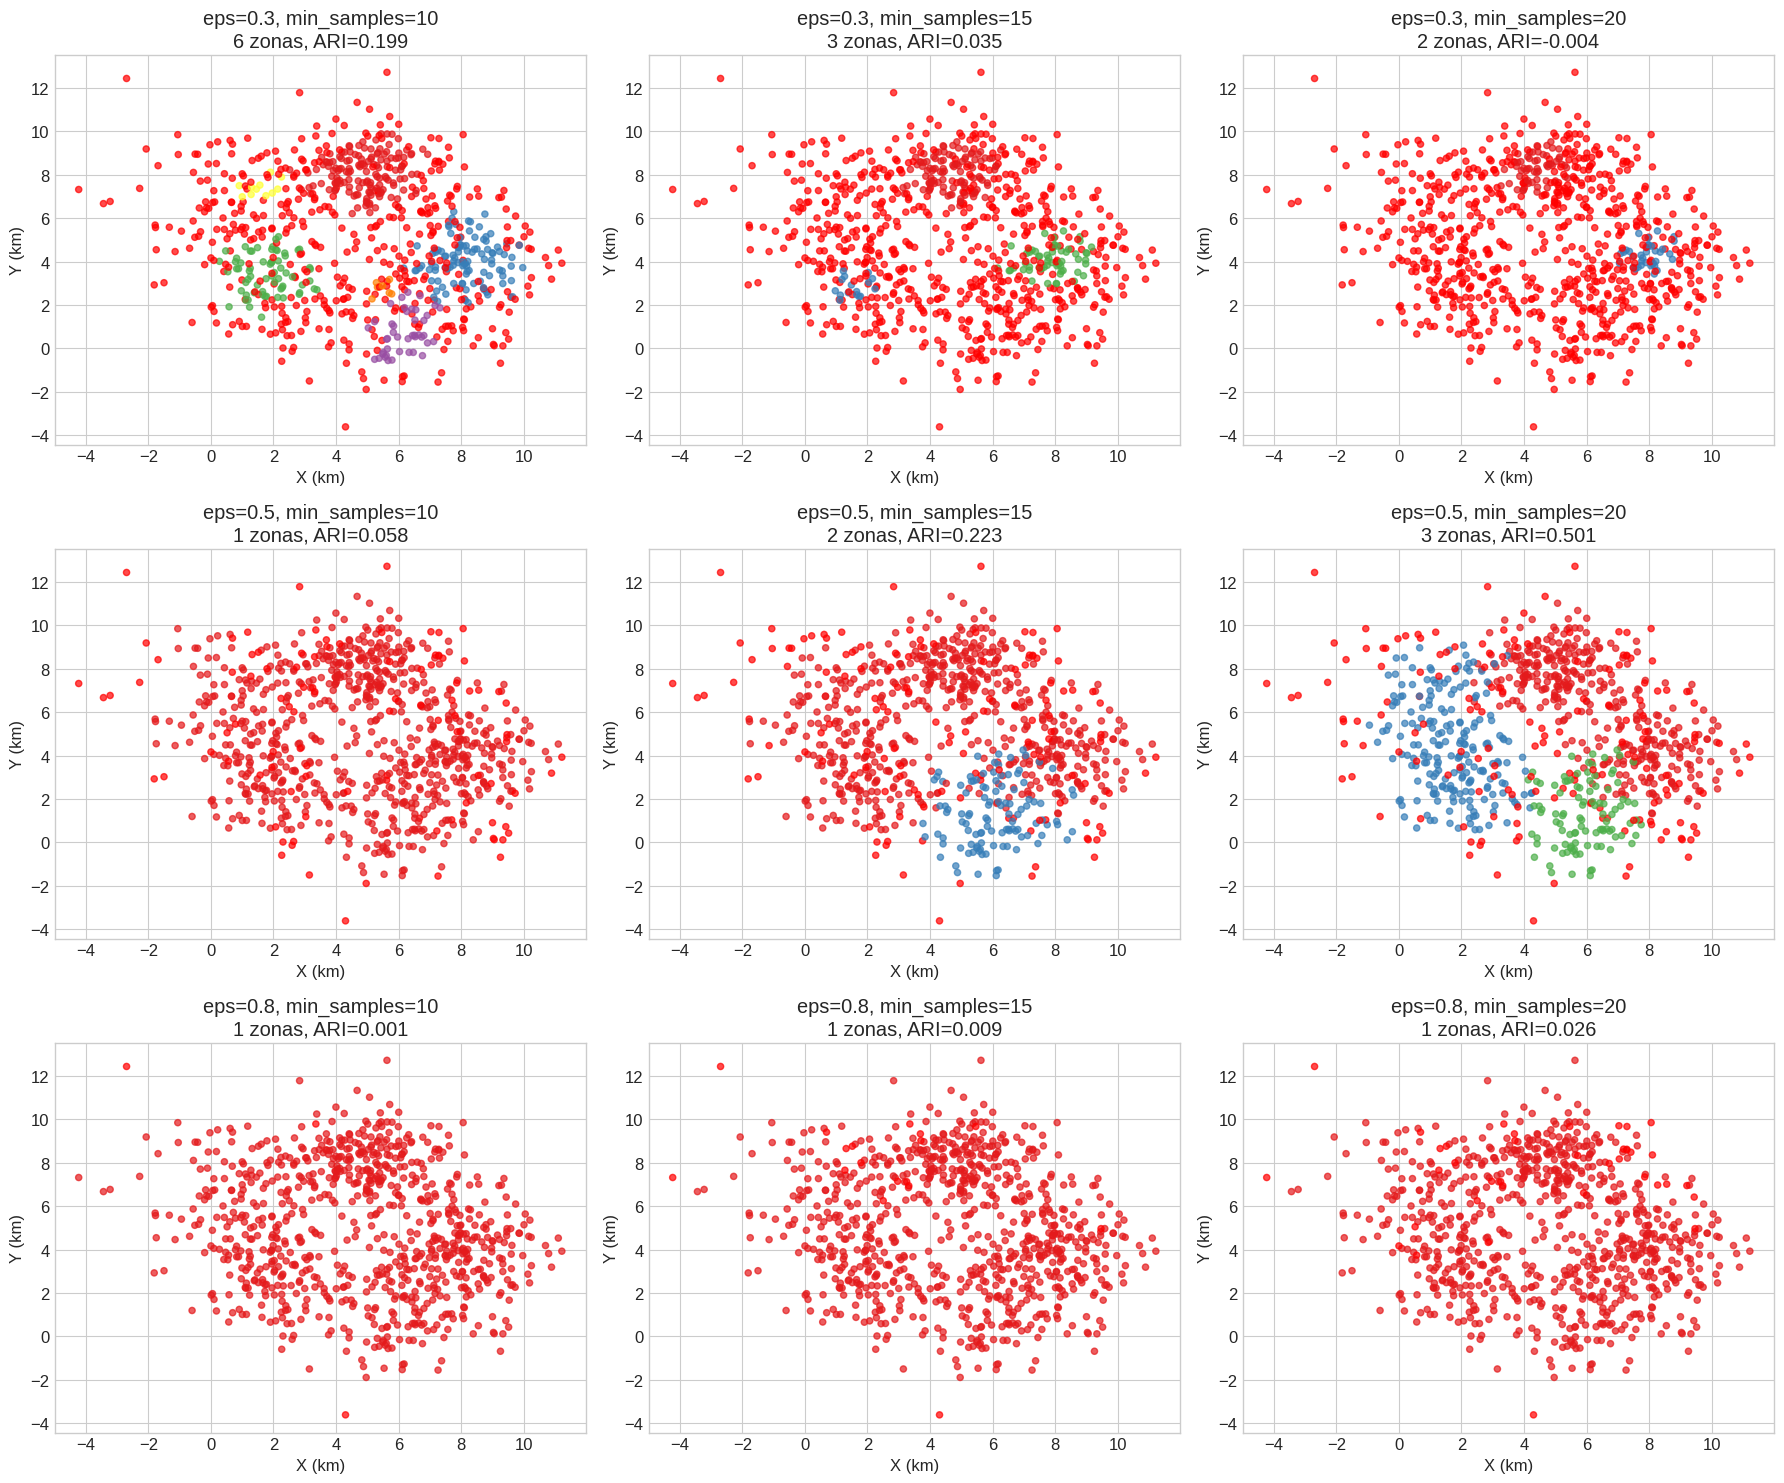


📊 Resultados de experimentos urbanos:
   eps  min_samples  n_clusters  n_noise  ari_score
0  0.3           10           6      451      0.199
1  0.3           15           3      649      0.035
2  0.3           20           2      735     -0.004
3  0.5           10           1       97      0.058
4  0.5           15           2      129      0.223
5  0.5           20           3      159      0.501
6  0.8           10           1        3      0.001
7  0.8           15           1       17      0.009
8  0.8           20           1       37      0.026

🏆 Mejores parámetros (ARI más alto):
   eps=0.5, min_samples=20
   ARI Score: 0.501


In [28]:
# Aplicar DBSCAN a los datos urbanos
print("🔍 Aplicando DBSCAN para detectar zonas urbanas...")

# Preparar datos (incluir coordenadas y nivel de actividad)
X_urban_features = np.column_stack([X_urban, activities])
scaler_urban = StandardScaler()
X_urban_scaled = scaler_urban.fit_transform(X_urban_features)

# Probar diferentes parámetros
eps_values = [0.3, 0.5, 0.8]
min_samples_values = [10, 15, 20]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(18, 15))

urban_results = []

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Aplicar DBSCAN
        dbscan_urban = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_urban = dbscan_urban.fit_predict(X_urban_scaled)

        # Calcular métricas
        n_clusters = len(set(clusters_urban)) - (1 if -1 in clusters_urban else 0)
        n_noise = list(clusters_urban).count(-1)

        # Calcular ARI (Adjusted Rand Index) para comparar con zonas reales
        ari_score = adjusted_rand_score(y_true_urban, clusters_urban)

        urban_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'ari_score': ari_score,
            'clusters': clusters_urban
        })

        # Visualizar
        ax = axes[i, j]
        unique_labels = set(clusters_urban)
        colors = ['red' if label == -1 else plt.cm.Set1(label % 10) for label in clusters_urban]

        ax.scatter(df_urban['X_coord'], df_urban['Y_coord'], c=colors, alpha=0.7, s=20)
        ax.set_title(f'eps={eps}, min_samples={min_samples}\n{n_clusters} zonas, ARI={ari_score:.3f}')
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')

plt.tight_layout()
plt.show()

# Mostrar tabla de resultados
print("\n📊 Resultados de experimentos urbanos:")
urban_results_df = pd.DataFrame(urban_results)
print(urban_results_df[['eps', 'min_samples', 'n_clusters', 'n_noise', 'ari_score']].round(3))

# Encontrar mejores parámetros (mayor ARI)
best_idx = urban_results_df['ari_score'].idxmax()
best_urban_params = urban_results_df.loc[best_idx]
print(f"\n🏆 Mejores parámetros (ARI más alto):")
print(f"   eps={best_urban_params['eps']}, min_samples={best_urban_params['min_samples']}")
print(f"   ARI Score: {best_urban_params['ari_score']:.3f}")

🏆 Analizando los mejores resultados para planificación urbana...


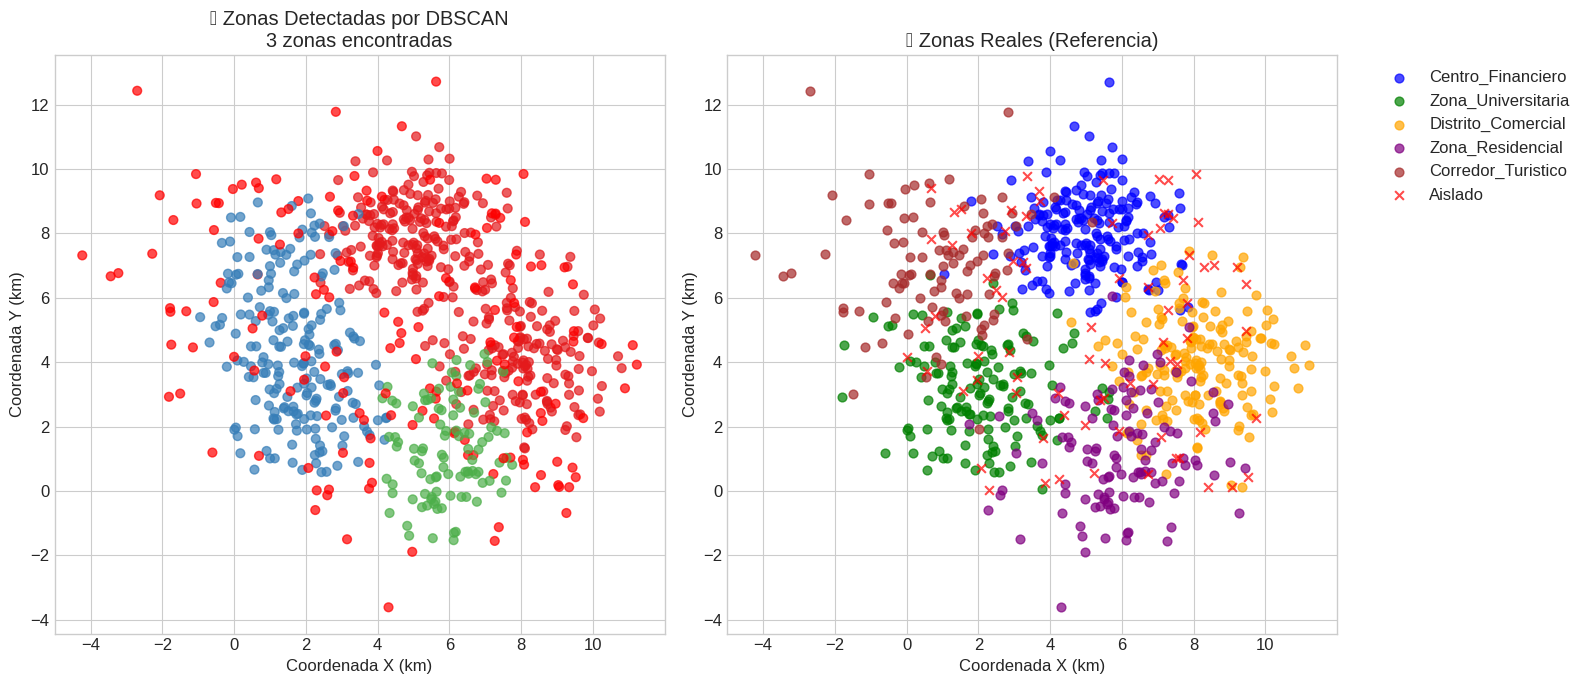


🏛️ Análisis de zonas detectadas por DBSCAN:

🏞️ Zona -1 (ÁREAS AISLADAS): 159 puntos
   📊 Actividad promedio: 1.25
   📍 Distribución: Dispersa por toda la ciudad
   💡 Interpretación: Parques, zonas rurales, áreas en desarrollo
   🎯 Recomendación: Evaluar para futura expansión urbana

🏙️ Zona 0: 364 puntos
   📊 Actividad promedio: 3.00
   📍 Centro: (6.4, 6.2)
   📏 Dispersión: 2.08 km
   💡 Tipo identificado: 🏢 Zona de Alta Actividad (Comercial/Financiera)
   🎯 Recomendación: Mejorar transporte público, aumentar seguridad

🏙️ Zona 1: 206 puntos
   📊 Actividad promedio: 2.05
   📍 Centro: (1.7, 4.4)
   📏 Dispersión: 1.65 km
   💡 Tipo identificado: 🏫 Zona de Actividad Media (Universitaria/Mixta)
   🎯 Recomendación: Servicios para jóvenes, espacios culturales

🏙️ Zona 2: 101 puntos
   📊 Actividad promedio: 0.96
   📍 Centro: (5.9, 1.3)
   📏 Dispersión: 1.18 km
   💡 Tipo identificado: 🏘️ Zona de Baja Actividad (Residencial)
   🎯 Recomendación: Parques, servicios familiares, transporte local

📈

In [29]:
# Análisis detallado de los mejores resultados urbanos
print("🏆 Analizando los mejores resultados para planificación urbana...")

# Usar los mejores parámetros
best_eps = best_urban_params['eps']
best_min_samples = int(best_urban_params['min_samples'])
best_clusters = best_urban_params['clusters']

df_urban['Cluster_DBSCAN'] = best_clusters

# Visualización comparativa final
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Zonas detectadas por DBSCAN
unique_labels = set(best_clusters)
colors = ['red' if label == -1 else plt.cm.Set1(label % 10) for label in best_clusters]
scatter1 = axes[0].scatter(df_urban['X_coord'], df_urban['Y_coord'],
                          c=colors, alpha=0.7, s=40)
axes[0].set_title(f'🔍 Zonas Detectadas por DBSCAN\n{len(unique_labels)-1} zonas encontradas')
axes[0].set_xlabel('Coordenada X (km)')
axes[0].set_ylabel('Coordenada Y (km)')

# Zonas reales para comparación
for zone in df_urban['True_Zone'].unique():
    subset = df_urban[df_urban['True_Zone'] == zone]
    marker = 'x' if zone == 'Aislado' else 'o'
    axes[1].scatter(subset['X_coord'], subset['Y_coord'],
                   c=zone_colors[zone], label=zone, alpha=0.7, s=40, marker=marker)

axes[1].set_title('✅ Zonas Reales (Referencia)')
axes[1].set_xlabel('Coordenada X (km)')
axes[1].set_ylabel('Coordenada Y (km)')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Análisis de cada zona detectada
print("\n🏛️ Análisis de zonas detectadas por DBSCAN:")
for cluster_id in sorted(set(best_clusters)):
    subset = df_urban[df_urban['Cluster_DBSCAN'] == cluster_id]

    if cluster_id == -1:
        print(f"\n🏞️ Zona {cluster_id} (ÁREAS AISLADAS): {len(subset)} puntos")
        print(f"   📊 Actividad promedio: {subset['Activity_Level'].mean():.2f}")
        print(f"   📍 Distribución: Dispersa por toda la ciudad")
        print(f"   💡 Interpretación: Parques, zonas rurales, áreas en desarrollo")
        print(f"   🎯 Recomendación: Evaluar para futura expansión urbana")
    else:
        avg_activity = subset['Activity_Level'].mean()
        center_x = subset['X_coord'].mean()
        center_y = subset['Y_coord'].mean()
        area_spread = subset[['X_coord', 'Y_coord']].std().mean()

        print(f"\n🏙️ Zona {cluster_id}: {len(subset)} puntos")
        print(f"   📊 Actividad promedio: {avg_activity:.2f}")
        print(f"   📍 Centro: ({center_x:.1f}, {center_y:.1f})")
        print(f"   📏 Dispersión: {area_spread:.2f} km")

        # Clasificar tipo de zona basado en actividad
        if avg_activity > 2.5:
            tipo = "🏢 Zona de Alta Actividad (Comercial/Financiera)"
            recomendacion = "Mejorar transporte público, aumentar seguridad"
        elif avg_activity > 1.5:
            tipo = "🏫 Zona de Actividad Media (Universitaria/Mixta)"
            recomendacion = "Servicios para jóvenes, espacios culturales"
        else:
            tipo = "🏘️ Zona de Baja Actividad (Residencial)"
            recomendacion = "Parques, servicios familiares, transporte local"

        print(f"   💡 Tipo identificado: {tipo}")
        print(f"   🎯 Recomendación: {recomendacion}")

# Métricas de calidad
print(f"\n📈 Métricas de calidad del clustering:")
print(f"   🎯 ARI Score: {best_urban_params['ari_score']:.3f} (0=aleatorio, 1=perfecto)")
if len(set(best_clusters)) > 1:
    silhouette = silhouette_score(X_urban_scaled, best_clusters)
    print(f"   📊 Silhouette Score: {silhouette:.3f} (-1=malo, 1=excelente)")
print(f"   🧍 Porcentaje de áreas aisladas: {list(best_clusters).count(-1)/len(best_clusters)*100:.1f}%")

## ⚖️ DBSCAN vs K-means: La Gran Comparación

### 🥊 El Enfrentamiento: Densidad vs Distancia

Vamos a comparar DBSCAN y K-means usando el mismo dataset para ver claramente sus diferencias.

| Característica | DBSCAN 🔍 | K-means 🎯 |
|----------------|-----------|-------------|
| **Filosofía** | "Encuentra grupos densos" | "Divide en K grupos equilibrados" |
| **Número de clusters** | Se descubre automáticamente | Debes especificar K |
| **Forma de clusters** | Cualquier forma | Tiende a ser esférica |
| **Outliers** | Los identifica automáticamente | Los asigna al cluster más cercano |
| **Sensibilidad a parámetros** | eps y min_samples | K y inicialización |
| **Escalabilidad** | Buena (O(n log n)) | Excelente (O(n)) |
| **Determinismo** | Determinista | Puede variar según inicialización |

In [30]:
# Crear datasets de prueba para comparar algoritmos
print("🧪 Creando datasets de prueba para comparación...")

# Dataset 1: Grupos bien separados (favorable para K-means)
X1, y1 = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Dataset 2: Formas complejas (favorable para DBSCAN)
X2, y2 = make_moons(n_samples=300, noise=0.1, random_state=42)

# Dataset 3: Círculos concéntricos (muy favorable para DBSCAN)
X3, y3 = make_circles(n_samples=300, noise=0.05, factor=0.6, random_state=42)

# Dataset 4: Densidades diferentes
# Crear manualmente grupos con diferentes densidades
np.random.seed(42)
cluster1 = np.random.normal([2, 2], 0.5, (100, 2))  # Denso
cluster2 = np.random.normal([6, 6], 1.5, (100, 2))  # Disperso
cluster3 = np.random.normal([2, 6], 0.3, (50, 2))   # Muy denso
outliers = np.random.uniform([0, 0], [8, 8], (20, 2))  # Outliers
X4 = np.vstack([cluster1, cluster2, cluster3, outliers])
y4 = np.array([0]*100 + [1]*100 + [2]*50 + [-1]*20)

datasets = [
    (X1, y1, "Grupos Bien Separados"),
    (X2, y2, "Formas de Luna"),
    (X3, y3, "Círculos Concéntricos"),
    (X4, y4, "Densidades Diferentes")
]

print("✅ Datasets de prueba creados")

🧪 Creando datasets de prueba para comparación...
✅ Datasets de prueba creados


⚖️ Comparando DBSCAN vs K-means...


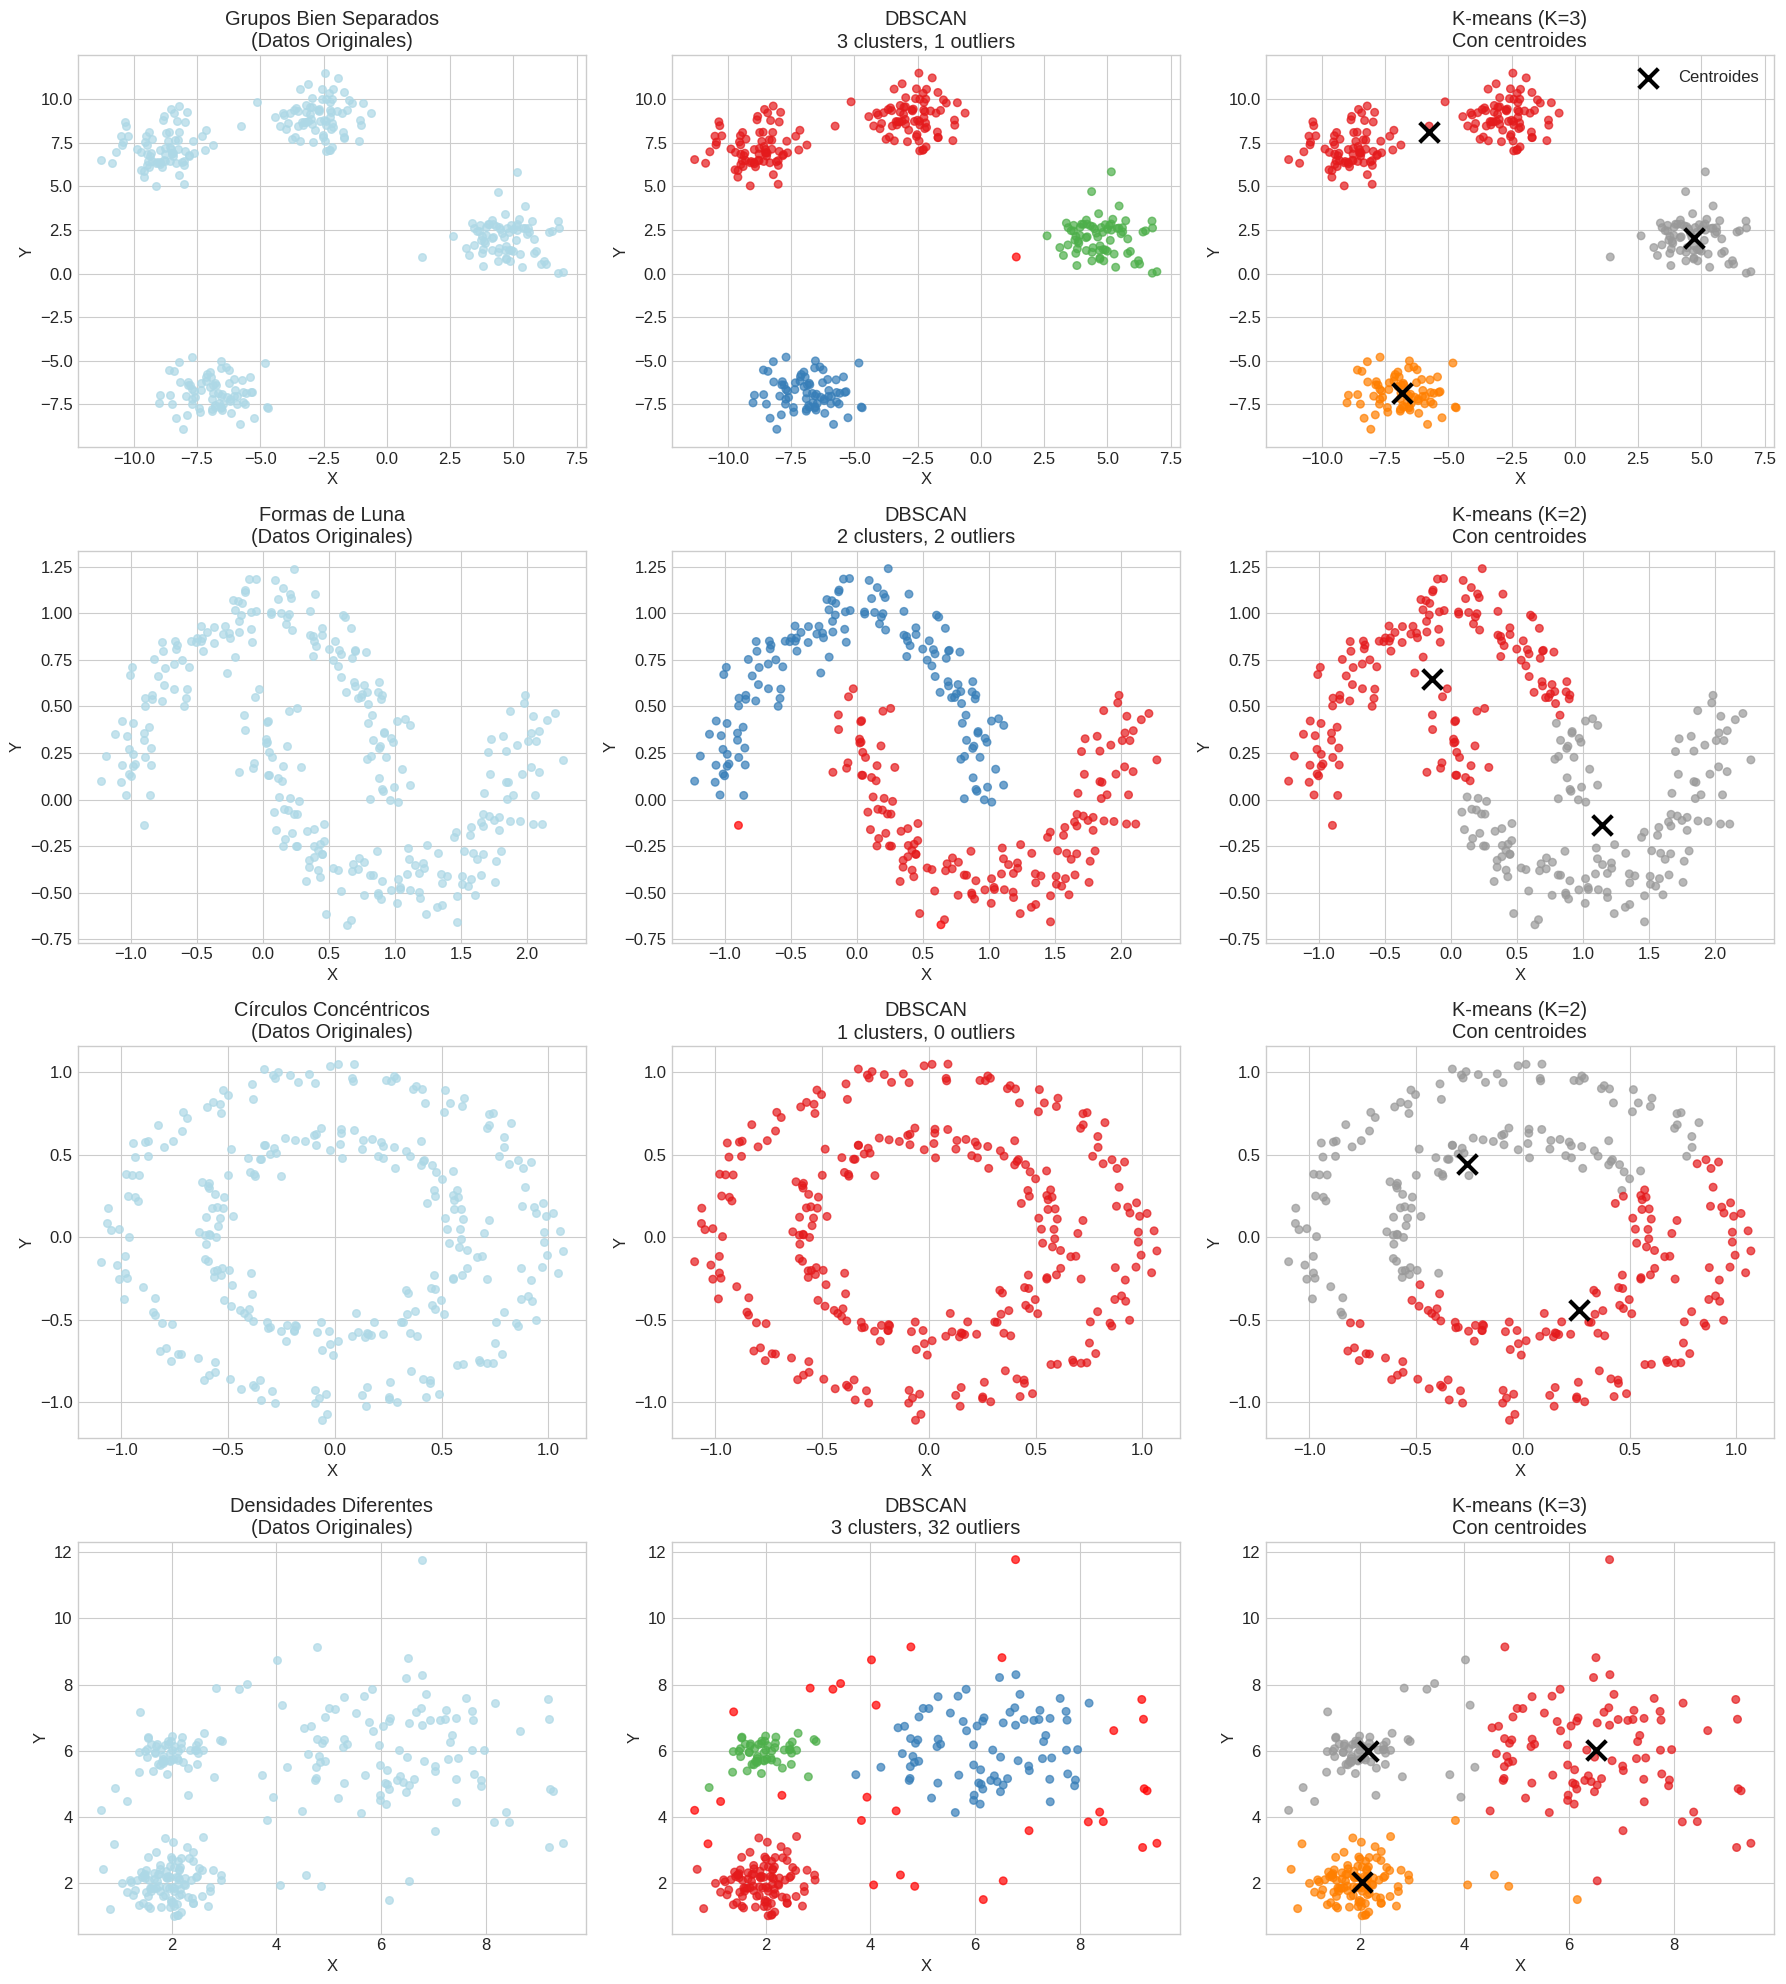


🧠 Observaciones de la comparación:

1. 📊 Grupos Bien Separados:
   ✅ K-means: Excelente, encuentra grupos perfectos
   ✅ DBSCAN: También bueno, pero puede crear más fragmentación

2. 🌙 Formas de Luna:
   ❌ K-means: Falla, divide las lunas incorrectamente
   ✅ DBSCAN: Excelente, sigue la forma natural

3. ⭕ Círculos Concéntricos:
   ❌ K-means: Falla completamente, no puede separar círculos
   ✅ DBSCAN: Perfecto, identifica cada círculo

4. 📈 Densidades Diferentes:
   ⚠️ K-means: Problemas con outliers y densidades
   ✅ DBSCAN: Maneja bien diferentes densidades y outliers


In [31]:
# Comparar DBSCAN vs K-means en todos los datasets
print("⚖️ Comparando DBSCAN vs K-means...")

fig, axes = plt.subplots(4, 3, figsize=(18, 20))

for i, (X, y_true, title) in enumerate(datasets):
    # Escalar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 1. Datos originales
    axes[i, 0].scatter(X[:, 0], X[:, 1], c='lightblue', alpha=0.7, s=30)
    axes[i, 0].set_title(f'{title}\n(Datos Originales)')
    axes[i, 0].set_xlabel('X')
    axes[i, 0].set_ylabel('Y')

    # 2. DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    clusters_dbscan = dbscan.fit_predict(X_scaled)

    n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
    n_noise_dbscan = list(clusters_dbscan).count(-1)

    colors_dbscan = ['red' if label == -1 else plt.cm.Set1(label % 10) for label in clusters_dbscan]
    axes[i, 1].scatter(X[:, 0], X[:, 1], c=colors_dbscan, alpha=0.7, s=30)
    axes[i, 1].set_title(f'DBSCAN\n{n_clusters_dbscan} clusters, {n_noise_dbscan} outliers')
    axes[i, 1].set_xlabel('X')
    axes[i, 1].set_ylabel('Y')

    # 3. K-means (usar el número de clusters encontrados por DBSCAN, o 3 por defecto)
    k = max(n_clusters_dbscan, 2) if n_clusters_dbscan > 0 else 3
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters_kmeans = kmeans.fit_predict(X_scaled)

    axes[i, 2].scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='Set1', alpha=0.7, s=30)
    # Mostrar centroides
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    axes[i, 2].scatter(centroids[:, 0], centroids[:, 1],
                      c='black', marker='x', s=200, linewidths=3, label='Centroides')
    axes[i, 2].set_title(f'K-means (K={k})\nCon centroides')
    axes[i, 2].set_xlabel('X')
    axes[i, 2].set_ylabel('Y')
    if i == 0:  # Solo mostrar leyenda en el primer subplot
        axes[i, 2].legend()

plt.tight_layout()
plt.show()

print("\n🧠 Observaciones de la comparación:")
print("\n1. 📊 Grupos Bien Separados:")
print("   ✅ K-means: Excelente, encuentra grupos perfectos")
print("   ✅ DBSCAN: También bueno, pero puede crear más fragmentación")
print("\n2. 🌙 Formas de Luna:")
print("   ❌ K-means: Falla, divide las lunas incorrectamente")
print("   ✅ DBSCAN: Excelente, sigue la forma natural")
print("\n3. ⭕ Círculos Concéntricos:")
print("   ❌ K-means: Falla completamente, no puede separar círculos")
print("   ✅ DBSCAN: Perfecto, identifica cada círculo")
print("\n4. 📈 Densidades Diferentes:")
print("   ⚠️ K-means: Problemas con outliers y densidades")
print("   ✅ DBSCAN: Maneja bien diferentes densidades y outliers")

## 🔧 Optimización de Parámetros: Encontrando el Epsilon Perfecto

### 🎯 El Desafío de los Parámetros

DBSCAN tiene dos parámetros principales:
- **eps (ε)**: El radio de vecindario
- **min_samples**: El número mínimo de puntos para formar un cluster

### 📏 Técnica del K-Distance Plot

Una técnica popular para encontrar el **eps** óptimo es el **k-distance plot**:
1. Para cada punto, calcular la distancia a su k-ésimo vecino más cercano
2. Ordenar estas distancias de mayor a menor
3. Buscar el "codo" en la gráfica
4. El punto del codo sugiere un buen valor para eps

📏 Aplicando técnica del K-Distance Plot...


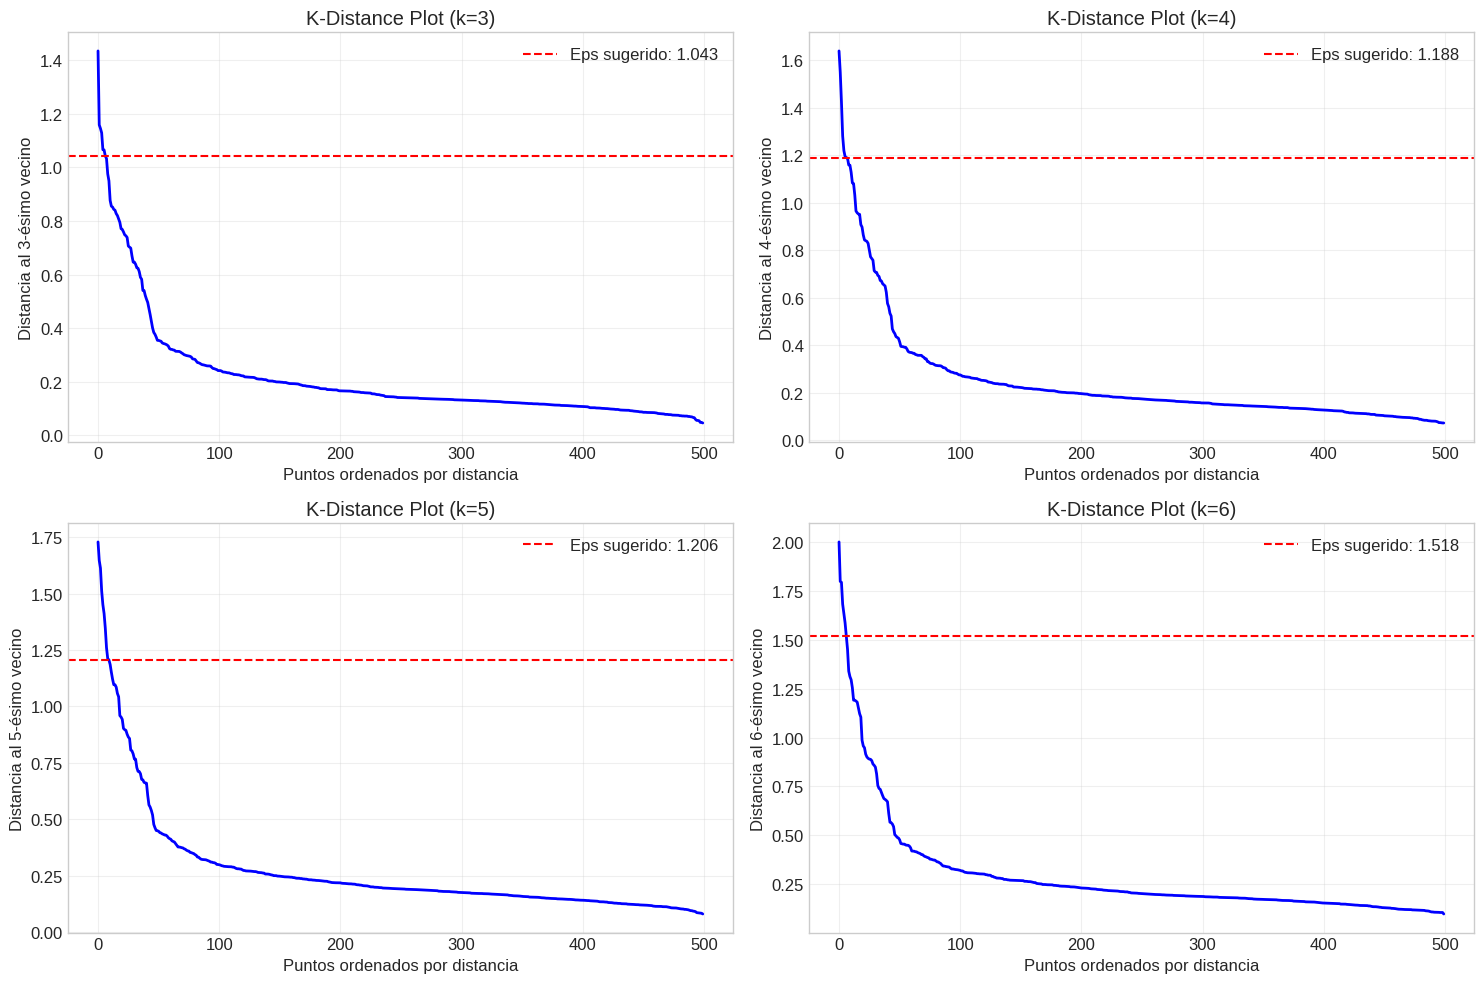


🎯 Valores de eps sugeridos:
   k=3: eps=1.043
   k=4: eps=1.188
   k=5: eps=1.206
   k=6: eps=1.518

📊 Promedio de eps sugeridos: 1.238
💡 Recomendación: Probar eps entre 0.991 y 1.486


In [32]:
# Técnica del K-Distance Plot para encontrar eps óptimo
print("📏 Aplicando técnica del K-Distance Plot...")

# Usar los datos de la cafetería como ejemplo
X_example = X_cafe_scaled

# Calcular k-distance para diferentes valores de k
k_values = [3, 4, 5, 6]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

suggested_eps = []

for i, k in enumerate(k_values):
    # Calcular distancias a los k vecinos más cercanos
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_example)
    distances, indices = neighbors_fit.kneighbors(X_example)

    # Tomar la distancia al k-ésimo vecino (última columna)
    k_distances = distances[:, k-1]
    k_distances = np.sort(k_distances, axis=0)[::-1]  # Ordenar descendente

    # Graficar
    axes[i].plot(range(len(k_distances)), k_distances, 'b-', linewidth=2)
    axes[i].set_title(f'K-Distance Plot (k={k})')
    axes[i].set_xlabel('Puntos ordenados por distancia')
    axes[i].set_ylabel(f'Distancia al {k}-ésimo vecino')
    axes[i].grid(True, alpha=0.3)

    # Encontrar el "codo" usando la segunda derivada
    # Suavizar la curva primero
    from scipy.ndimage import uniform_filter1d
    smoothed = uniform_filter1d(k_distances, size=10)

    # Calcular segunda derivada
    second_derivative = np.gradient(np.gradient(smoothed))

    # Encontrar el punto de máxima curvatura (máximo de la segunda derivada)
    elbow_idx = np.argmax(second_derivative[:len(second_derivative)//2])  # Buscar en la primera mitad
    suggested_eps_value = k_distances[elbow_idx]
    suggested_eps.append(suggested_eps_value)

    # Marcar el codo sugerido
    axes[i].axhline(y=suggested_eps_value, color='red', linestyle='--',
                   label=f'Eps sugerido: {suggested_eps_value:.3f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Mostrar valores sugeridos
print("\n🎯 Valores de eps sugeridos:")
for i, (k, eps) in enumerate(zip(k_values, suggested_eps)):
    print(f"   k={k}: eps={eps:.3f}")

avg_suggested_eps = np.mean(suggested_eps)
print(f"\n📊 Promedio de eps sugeridos: {avg_suggested_eps:.3f}")
print(f"💡 Recomendación: Probar eps entre {avg_suggested_eps*0.8:.3f} y {avg_suggested_eps*1.2:.3f}")

In [33]:
# Búsqueda en grilla para encontrar los mejores parámetros
print("🔍 Búsqueda exhaustiva de parámetros óptimos...")

# Definir rangos de parámetros basados en el análisis anterior
eps_range = np.arange(0.2, 1.0, 0.1)
min_samples_range = range(3, 20, 2)

# Métricas para evaluar
results_grid = []

print(f"🧪 Probando {len(eps_range)} valores de eps × {len(min_samples_range)} valores de min_samples = {len(eps_range) * len(min_samples_range)} combinaciones")

for eps in eps_range:
    for min_samples in min_samples_range:
        # Aplicar DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_cafe_scaled)

        # Calcular métricas
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        noise_ratio = n_noise / len(clusters)

        # Calcular silhouette score (solo si hay más de 1 cluster)
        silhouette = -1  # Valor por defecto
        if n_clusters > 1 and n_clusters < len(clusters) - 1:
            try:
                silhouette = silhouette_score(X_cafe_scaled, clusters)
            except:
                silhouette = -1

        # Calcular ARI con las etiquetas reales
        ari = adjusted_rand_score(y_true_cafe, clusters)

        results_grid.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette': silhouette,
            'ari': ari
        })

# Convertir a DataFrame para análisis
results_df = pd.DataFrame(results_grid)

print("✅ Búsqueda completada")
print("\n📊 Estadísticas de la búsqueda:")
print(f"   🎯 Rango de clusters encontrados: {results_df['n_clusters'].min()} - {results_df['n_clusters'].max()}")
print(f"   🧍 Rango de ruido: {results_df['noise_ratio'].min():.1%} - {results_df['noise_ratio'].max():.1%}")
print(f"   📈 Mejor ARI: {results_df['ari'].max():.3f}")
print(f"   📊 Mejor Silhouette: {results_df['silhouette'].max():.3f}")

🔍 Búsqueda exhaustiva de parámetros óptimos...
🧪 Probando 8 valores de eps × 9 valores de min_samples = 72 combinaciones
✅ Búsqueda completada

📊 Estadísticas de la búsqueda:
   🎯 Rango de clusters encontrados: 1 - 7
   🧍 Rango de ruido: 0.8% - 87.6%
   📈 Mejor ARI: 0.959
   📊 Mejor Silhouette: 0.634


📊 Visualizando resultados de la búsqueda de parámetros...


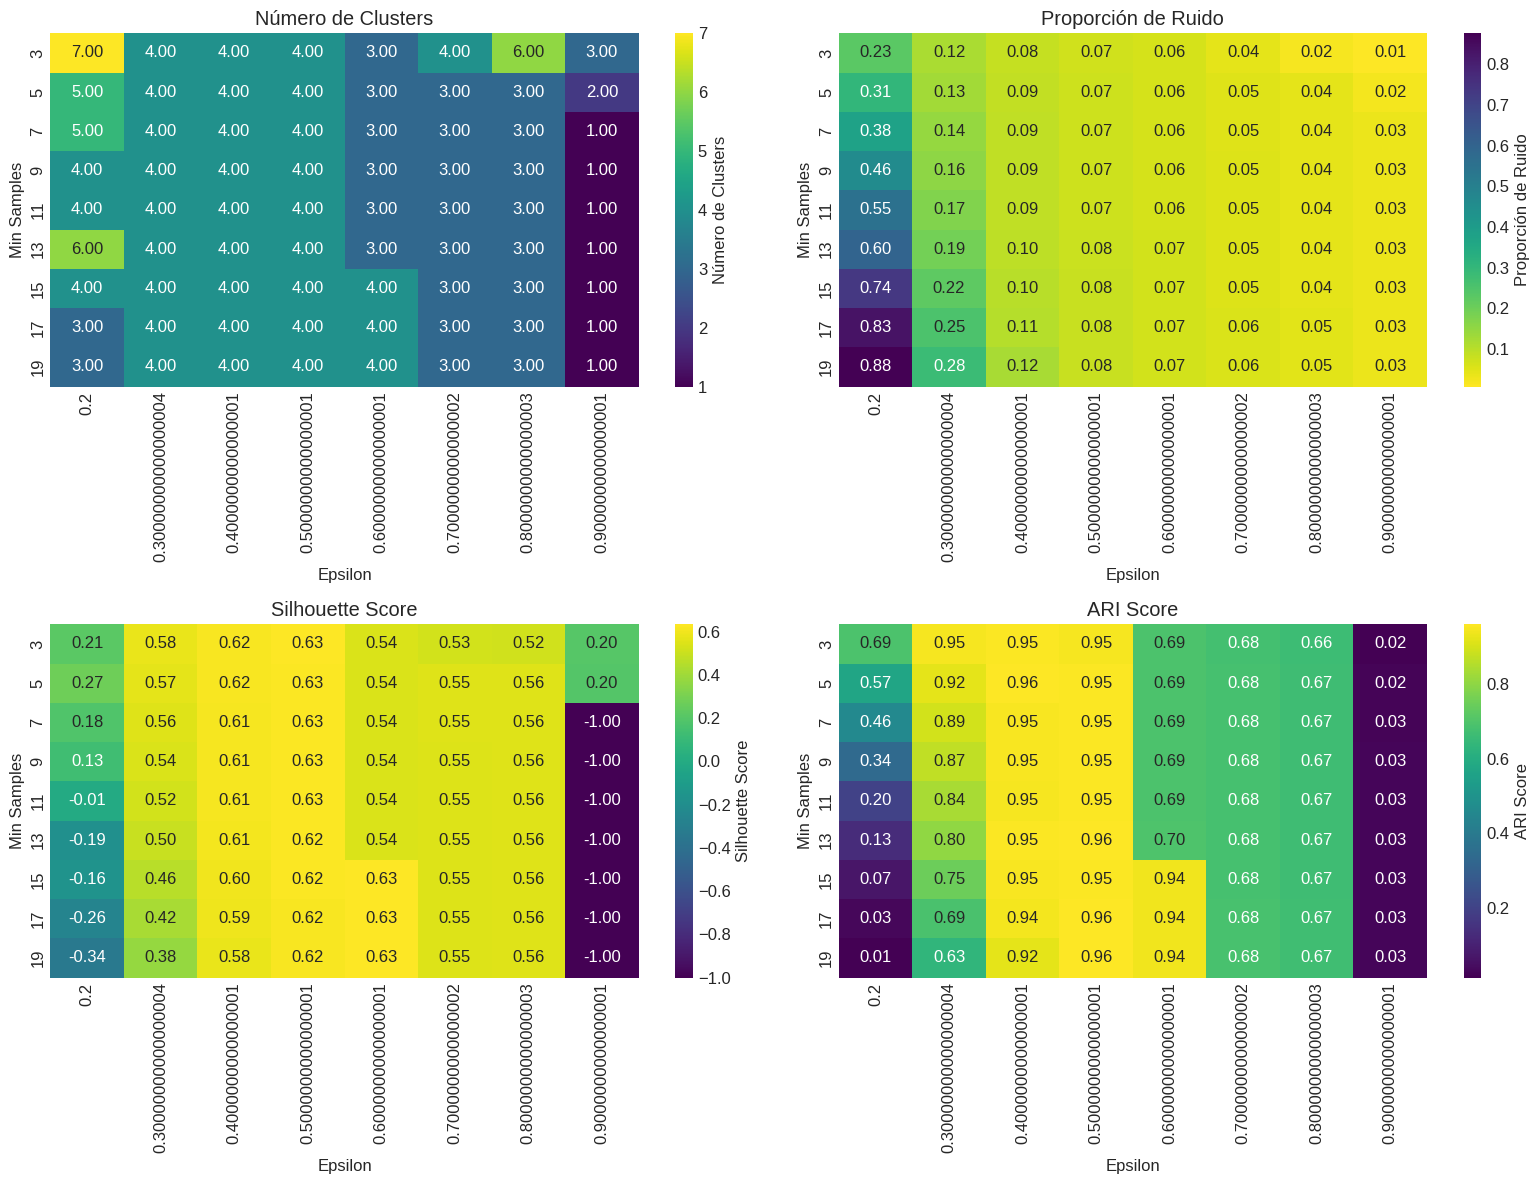


🏆 Mejores parámetros según diferentes criterios:

🎯 Mejor ARI (0.959):
   eps=0.5, min_samples=17.0
   4.0 clusters, 8.2% ruido

📊 Mejor Silhouette (0.634):
   eps=0.6, min_samples=15.0
   4.0 clusters, 6.6% ruido

⚖️ Mejor Compromiso (score combinado: 0.978):
   eps=0.6, min_samples=15.0
   4.0 clusters, 6.6% ruido
   ARI: 0.939, Silhouette: 0.634


In [34]:
# Visualizar los resultados de la búsqueda de parámetros
print("📊 Visualizando resultados de la búsqueda de parámetros...")

# Crear heatmaps para diferentes métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Preparar datos para heatmap
pivot_data = {}
metrics = ['n_clusters', 'noise_ratio', 'silhouette', 'ari']
titles = ['Número de Clusters', 'Proporción de Ruido', 'Silhouette Score', 'ARI Score']

for metric in metrics:
    pivot_data[metric] = results_df.pivot(index='min_samples', columns='eps', values=metric)

# Crear heatmaps
for i, (metric, title) in enumerate(zip(metrics, titles)):
    row, col = i // 2, i % 2

    # Elegir colormap apropiado
    cmap = 'viridis' if metric in ['n_clusters', 'silhouette', 'ari'] else 'viridis_r'

    sns.heatmap(pivot_data[metric], annot=True, fmt='.2f', cmap=cmap,
                ax=axes[row, col], cbar_kws={'label': title})
    axes[row, col].set_title(f'{title}')
    axes[row, col].set_xlabel('Epsilon')
    axes[row, col].set_ylabel('Min Samples')

plt.tight_layout()
plt.show()

# Encontrar mejores parámetros según diferentes criterios
print("\n🏆 Mejores parámetros según diferentes criterios:")

# Filtrar resultados razonables (2-6 clusters, menos del 20% de ruido)
reasonable_results = results_df[
    (results_df['n_clusters'] >= 2) &
    (results_df['n_clusters'] <= 6) &
    (results_df['noise_ratio'] <= 0.2)
]

if len(reasonable_results) > 0:
    # Mejor ARI
    best_ari = reasonable_results.loc[reasonable_results['ari'].idxmax()]
    print(f"\n🎯 Mejor ARI ({best_ari['ari']:.3f}):")
    print(f"   eps={best_ari['eps']:.1f}, min_samples={best_ari['min_samples']}")
    print(f"   {best_ari['n_clusters']} clusters, {best_ari['noise_ratio']:.1%} ruido")

    # Mejor Silhouette
    valid_silhouette = reasonable_results[reasonable_results['silhouette'] > 0]
    if len(valid_silhouette) > 0:
        best_silhouette = valid_silhouette.loc[valid_silhouette['silhouette'].idxmax()]
        print(f"\n📊 Mejor Silhouette ({best_silhouette['silhouette']:.3f}):")
        print(f"   eps={best_silhouette['eps']:.1f}, min_samples={best_silhouette['min_samples']}")
        print(f"   {best_silhouette['n_clusters']} clusters, {best_silhouette['noise_ratio']:.1%} ruido")

    # Compromiso balanceado (combinando métricas)
    # Normalizar métricas y crear score combinado
    reasonable_results = reasonable_results.copy()
    reasonable_results['ari_norm'] = (reasonable_results['ari'] - reasonable_results['ari'].min()) / (reasonable_results['ari'].max() - reasonable_results['ari'].min())
    reasonable_results['silhouette_norm'] = reasonable_results['silhouette'].fillna(0)
    reasonable_results['silhouette_norm'] = (reasonable_results['silhouette_norm'] - reasonable_results['silhouette_norm'].min()) / (reasonable_results['silhouette_norm'].max() - reasonable_results['silhouette_norm'].min())
    reasonable_results['noise_penalty'] = 1 - reasonable_results['noise_ratio']

    reasonable_results['combined_score'] = (reasonable_results['ari_norm'] * 0.4 +
                                          reasonable_results['silhouette_norm'] * 0.4 +
                                          reasonable_results['noise_penalty'] * 0.2)

    best_combined = reasonable_results.loc[reasonable_results['combined_score'].idxmax()]
    print(f"\n⚖️ Mejor Compromiso (score combinado: {best_combined['combined_score']:.3f}):")
    print(f"   eps={best_combined['eps']:.1f}, min_samples={best_combined['min_samples']}")
    print(f"   {best_combined['n_clusters']} clusters, {best_combined['noise_ratio']:.1%} ruido")
    print(f"   ARI: {best_combined['ari']:.3f}, Silhouette: {best_combined['silhouette']:.3f}")

else:
    print("⚠️ No se encontraron parámetros que cumplan los criterios razonables")
    print("💡 Considera ajustar los rangos de búsqueda")

## 🎉 Conclusiones y Mejores Prácticas

### 🧠 Lo que hemos aprendido sobre DBSCAN

1. **🔍 DBSCAN es el detective de patrones**: Encuentra grupos naturales sin que le digas cuántos buscar
2. **🌙 Maneja formas complejas**: A diferencia de K-means, puede encontrar clusters de cualquier forma
3. **🧍 Identifica outliers automáticamente**: Perfecto para detección de anomalías
4. **📏 Los parámetros importan**: eps y min_samples deben elegirse cuidadosamente
5. **⚖️ No siempre es mejor**: K-means sigue siendo superior para grupos esféricos bien separados

### 🎯 Cuándo usar DBSCAN

**✅ USA DBSCAN cuando:**
- No sabes cuántos grupos hay en tus datos
- Sospechas que los grupos tienen formas irregulares
- Necesitas identificar outliers automáticamente
- Los grupos pueden tener densidades diferentes
- Trabajas con datos geográficos o espaciales

**❌ NO uses DBSCAN cuando:**
- Los grupos son claramente esféricos y bien separados
- Necesitas que todos los puntos pertenezcan a un grupo
- Trabajas con datos de muy alta dimensionalidad (>20 dimensiones)
- Los grupos tienen densidades muy diferentes
- Necesitas resultados deterministas y reproducibles

### 🛠️ Mejores Prácticas

1. **📊 Siempre escala tus datos** antes de aplicar DBSCAN
2. **📏 Usa el k-distance plot** para encontrar eps
3. **🧪 Experimenta con diferentes parámetros** y evalúa múltiples métricas
4. **👁️ Visualiza los resultados** siempre que sea posible
5. **🧠 Interpreta los clusters** en el contexto de tu problema de negocio
6. **⚖️ Compara con otros algoritmos** como K-means para validar
7. **🔄 Itera y refina** basándote en feedback del dominio

### 🚀 Próximos Pasos

- **🔬 Explora variantes**: HDBSCAN, OPTICS para casos más complejos
- **🌐 Aplica a tus datos**: Usa DBSCAN en tus proyectos reales
- **📈 Combina con otras técnicas**: PCA + DBSCAN, o DBSCAN + clasificación
- **🤖 Automatiza la selección de parámetros**: Implementa búsqueda automática

¡Felicidades! 🎉 Ahora dominas DBSCAN y puedes aplicarlo para descubrir patrones ocultos en cualquier dataset.